<a href="https://colab.research.google.com/github/rashmi0852/Netflix_Content_Clustering_and_Recommended_System/blob/main/Netflix_Content_and_Recommended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Netflix_Content_Clustering_and_Recommended_System





##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Rashmiranjan Nayak


# **Project Summary -**


The project `Netflix Content Clustering and Recommended System` embarked on an exciting journey to explore the vast and diverse world of Netflix's TV shows and movies. Our primary objectives were to cluster content effectively, gain valuable insights into viewer preferences, and create a personalized recommendation system to enhance user experience and reduce subscriber churn. Here, we summarize the key steps, challenges encountered, insights gained, and our overarching goals.

**Key Steps:**

1. **Data Collection and Preprocessing:**
  project kicked off with the collection of data on Netflix's extensive content library. We gathered information on titles, genres, countries of production, and user reviews. Preprocessing involved handling missing data, text analysis, and encoding categorical variables for subsequent analysis.

2. **Clustering Analysis:**
   To understand the inherent structures within the content, we employed two powerful clustering algorithms: K-Means and Agglomerative Hierarchical Clustering. These techniques allowed us to categorize content into clusters, with K-Means yielding an optimal cluster count of 4 and Agglomerative Hierarchical Clustering pointing to 2 clusters as ideal.

3. **Choice of Evaluation Metric:**
   Silhouette Score as  evaluation metric to assess the quality of clusters. Silhouette Score considers both intra-cluster cohesion and inter-cluster separation, providing a more comprehensive understanding of the clustering quality compared to the distortion score.

4. **Building a Personalized Recommendation System:**
   The crux of  project was the creation of a recommendation system. It harnesses user viewing history, preferences, and behaviors to match subscribers to content clusters that best reflect their tastes. The system then suggests content from within the user's cluster and occasionally introduces diversification with adjacent clusters.

**Challenges Encountered:**

Throughout this project, several challenges emerged:

**Data Volume and Quality:** Managing a dataset of Netflix's scale can be challenging. We faced issues with missing or incomplete data, which required data imputation and careful handling.

**Algorithm Selection:** Deciding on the appropriate clustering algorithms and evaluation metrics demanded careful consideration. Selecting K-Means and Agglomerative Hierarchical Clustering based on Silhouette Score was a pivotal but challenging choice.

**Personalization and Diversity:** Striking a balance between personalization and diversity in recommendations was a complex challenge. Users seek content aligned with their interests while also desiring occasional exploration beyond their comfort zones.

**Interpreting Clusters:** Understanding the meaning and implications of the content clusters was a non-trivial task. Each cluster had unique characteristics and demanded a nuanced interpretation.

**Content and User Privacy:** We took user privacy and data ethics into account, ensuring that user data was anonymized and used solely for recommendation purposes.

**Insights and Goals:**

project yielded profound insights into Netflix's content and subscriber base. The clustering analysis illuminated the diversity of content genres and origin countries. It also highlighted production trends over the years, reflecting Netflix's agile response to the ever-evolving streaming industry.

Global influences were evident, with the dominance of the United States and the rise of Indian content underscoring industry dynamics and market growth.

Regional success stories, such as South Korean dramas and Canada's content industry support, provided compelling evidence of cultural impact and financial incentives.

Viewer engagement preferences varied widely, spanning Japanese voice actors, crime TV shows, kids' content, British TV shows, and documentaries.

The involvement of prolific directors and actors in Netflix productions demonstrated the platform's commitment to quality and collaboration within and beyond the entertainment industry.

Looking ahead, my ultimate goal is to bolster Netflix's commitment to a global audience by offering diverse, high-quality content and personalized recommendations.My aim is to create a user experience that resonates with individual tastes, enhances user engagement, and ultimately reduces subscriber churn. Netflix's journey continues to shape the entertainment streaming landscape, and our project has contributed to this ongoing evolution.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


- Netflix is the world's largest online streaming service provider, with over 220 million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.
- We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.
- The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [67]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from scipy.stats import chi2_contingency

# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

from statsmodels.stats.proportion import proportions_ztest

### Dataset Loading

In [68]:
# Load Dataset
netflix=pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [69]:
# Dataset First Look
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [70]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [71]:
# Dataset Rows & Columns count

num_rows, num_cols = netflix.shape

print("Total rows in dataset=",num_rows)

print("Total columns in dataset=",num_cols)


Total rows in dataset= 7787
Total columns in dataset= 12


### Dataset Information

In [72]:
# Dataset Info
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [73]:
# Dataset Duplicate Value Count
netflix.duplicated().sum()

0

#### Missing Values/Null Values

In [74]:
# Missing Values/Null Values Count
print (f"Missing Values in each column"+"\n" + "--"*15)
netflix.isnull().sum()

Missing Values in each column
------------------------------


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

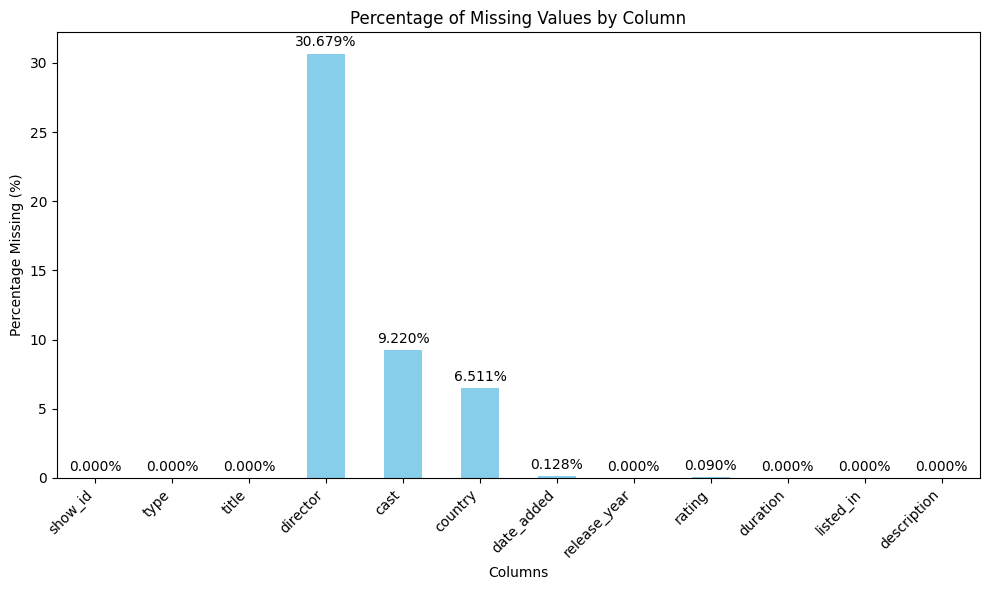

In [75]:
# Visualizing the missing values

#Calculate missing persentage for each column
missing_percent =round( (netflix.isnull().mean())*100,3)


#Bar plot
plt.figure(figsize=(10, 6))
bars=missing_percent.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45,ha="right")

# Add data labels to the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()



### What did you know about your dataset?

By exploring Netflix content datset following insights were found
* The dataset contains 12 features and 7,787 records.
* Five features contain missing values, with "director" having the highest number of null values, accounting for approximately 30% of its data, while the other four features have less than 10% missing data.
* Out of the 12 features, 11 are of categorical type, while the feature "release_year" is of numerical type.
* The "date_added" column values are in a time/date format, and the "duration" column values are in numeric format, so both need to be converted to their respective data types from the object type.

## ***2. Understanding Your Variables***

In [76]:
# Dataset Columns
# Dataset Columns
print(f"Available columns:\n{netflix.columns}")

Available columns:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [77]:
# Dataset Describe
netflix.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

* show_id: Unique identifier for each movie/show.

* type: Indicates whether the entry is a movie or a TV show.

* title: Name of the movie or TV show.

* director: Name of the director(s) of the movie or TV show.

* cast: Names of the actors and actresses featured in the movie or TV show.

* country: Country or countries where the movie or TV show was produced.

* date_added: Date when the movie or TV show was added to Netflix.

* release_year: Year when the movie or TV show was released.

* rating: TV rating or movie rating of the movie or TV show.

* duration: Length of the movie or TV show in minutes or seasons.

* listed_in: Categories or genres of the movie or TV show.

* description: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [78]:
# Check Unique Values for each variable.
for column in netflix.columns:
    # Get value counts for the current column
    value_counts = netflix[column].value_counts()

    # Get the number of unique values for the current column
    nunique = netflix[column].nunique()

    # Print the results for the current column
    print("--" * 50)
    print("Column Name:", column)
    print("\nNumber of Unique Values:", nunique)
    print("\nValue Counts:")
    print(value_counts,"\n")
    print("--" * 50)
    print("\n")


----------------------------------------------------------------------------------------------------
Column Name: show_id

Number of Unique Values: 7787

Value Counts:
s1       1
s5172    1
s5200    1
s5199    1
s5198    1
        ..
s2592    1
s2591    1
s2590    1
s2589    1
s7787    1
Name: show_id, Length: 7787, dtype: int64 

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Column Name: type

Number of Unique Values: 2

Value Counts:
Movie      5377
TV Show    2410
Name: type, dtype: int64 

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Column Name: title

Number of Unique Values: 7787

Value Counts:
3%                                          1
Results                     

* Focus is on several key columns of our dataset, including 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.
* By utilizing these features, plan is to create a cluster column and implement both K-means and Hierarchical clustering algorithms.
Additionally, I will  develop a content-based recommendation system that utilizes the information from these columns to provide personalized suggestions to users. This approach will allow us to gain valuable insights and group similar data points together, as well as provide personalized recommendations based on user preferences and viewing history.

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Handeling Null Values

In [79]:
#Calculate missing persentage for each column
missing_percent =round( (netflix.isnull().mean())*100,3)
print(missing_percent )

show_id          0.000
type             0.000
title            0.000
director        30.679
cast             9.220
country          6.511
date_added       0.128
release_year     0.000
rating           0.090
duration         0.000
listed_in        0.000
description      0.000
dtype: float64


In [80]:
# Drop records of those columns whose missing values less than 5%.
netflix.dropna(subset=["rating","date_added"],inplace=True)

In [81]:
#calculate mode & fill missing of country column

# Create a SimpleImputer with the "most_frequent" strategy
imputer = SimpleImputer(strategy='most_frequent')

# Transform and fill the missing values in the "country" column
netflix['country'] = imputer.fit_transform(netflix[['country']])

In [82]:
# Replace missing values in the "cast" column with "unknown"
netflix['cast'].fillna('unknown', inplace=True)

# Replace missing values in the "director" column with "unknown"
netflix['director'].fillna('unknown', inplace=True)

In [83]:
#Calculate missing persentage for each column
missing_percent =round( (netflix.isnull().mean())*100,3)
print(missing_percent)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64


#### Duration to numeric

In [84]:
# Extract the numeric part of the "duration" column and convert it to integer
netflix['duration'] = netflix['duration'].str.extract('(\d+)').astype(int)


In [85]:
netflix["duration"].head()

0      4
1     93
2     78
3     80
4    123
Name: duration, dtype: int64

#### date_added to date type

In [86]:
# Convert the "date_added" column to datetime type
netflix['date_added'] = pd.to_datetime(netflix['date_added'])


In [87]:
# Extract date, month, and year
netflix['added_day'] = netflix['date_added'].dt.day
netflix['added_month'] = netflix['date_added'].dt.month
netflix['added_year'] = netflix['date_added'].dt.year



In [88]:
netflix[["date_added","added_day","added_month","added_year"]].head()

,date_added,added_day,added_month,added_year
0,2020-08-14,14,8,2020
1,2016-12-23,23,12,2016
2,2018-12-20,20,12,2018
3,2017-11-16,16,11,2017
4,2020-01-01,1,1,2020


In [89]:
# Dropping date_added
netflix.drop('date_added', axis=1, inplace=True)

#### Ratings handeling

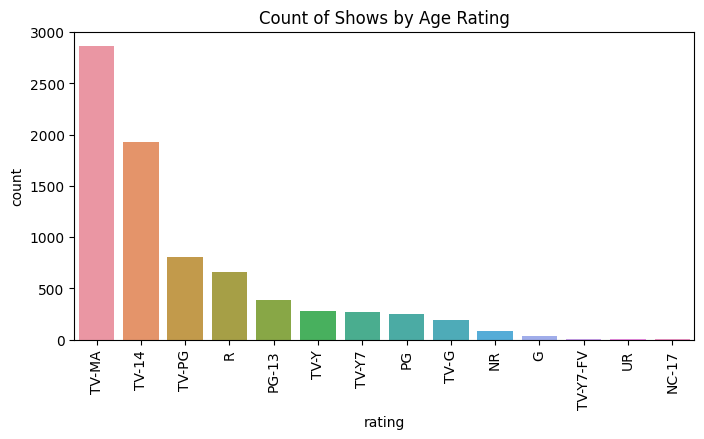

In [90]:
# Create a countplot to visualize the age ratings
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=netflix, order=netflix['rating'].value_counts().index)
plt.title('Count of Shows by Age Rating')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [91]:
#Unique values of rating
print(netflix["rating"].unique())
netflix["rating"].nunique()

['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']


14

In [92]:
#Create corresponding alternate map for all categories
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'NR':'Adults',
              'NC-17':'Adults',
              'UR':'Adults',
              'TV-14':'Young Adults',
              'PG-13':'Teens',
              'TV-PG':'Older Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'TV-Y7-FV':'Older Kids',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'G':'Kids',
            }

In [93]:
#Replace by map values
netflix['rating'].replace(rating_map, inplace = True)

In [94]:
print(netflix['rating'].unique())

['Adults' 'Teens' 'Young Adults' 'Older Kids' 'Kids']


#### Extract primary value for country & listed_in

In [95]:
#check values of coutry column
netflix["country"].value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [96]:
#check values of listed_in column
netflix["listed_in"].value_counts()


Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [97]:
# Function to extract the primary value
def extract_primary(value):
    if isinstance(value, str):
        return value.split(',')[0]
    return value

# Apply the function to 'country' and 'listed_in' columns
netflix['country'] = netflix['country'].apply(extract_primary)
netflix['listed_in'] = netflix['listed_in'].apply(extract_primary)

#keep oroginal copy safe
netflix_data=netflix.copy()

netflix_data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_day,added_month,added_year
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,14,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,23,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",20,12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",16,11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1,1,2020


### What all manipulations have you done and insights you found?

* ***missing values handeling:***
 - Netfix dataset have null values in 5 columns .`rating`,`date_added` contains missing values less than 5 % so i droped them with dropna().
 - `country`,`cast` & `director` has missing values 6%,9% & 30% respectively ,country column missing values replaced by most frequent values with simple imputer() & cast & director replaced by unknown value.
* ***Duration , Date_added & Ratings Handeling:***
 - `duration` column contains values for content duration & it was originally in object form , convered to integer form by removing min/season word from it.
 - `date_added` has date within so it converted to date form & then day,month year exrated from it.
 - `ratings` contains multiple types of ratings from different userd ,it converted to adult,kinds,teens etc form.
* ***Extract primary value for country & listed_in:***
 - `country`,`listed_in` has multiple values within it ,primary value is extrated from both the columns.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Univariate Analysis

#### Chart - 1

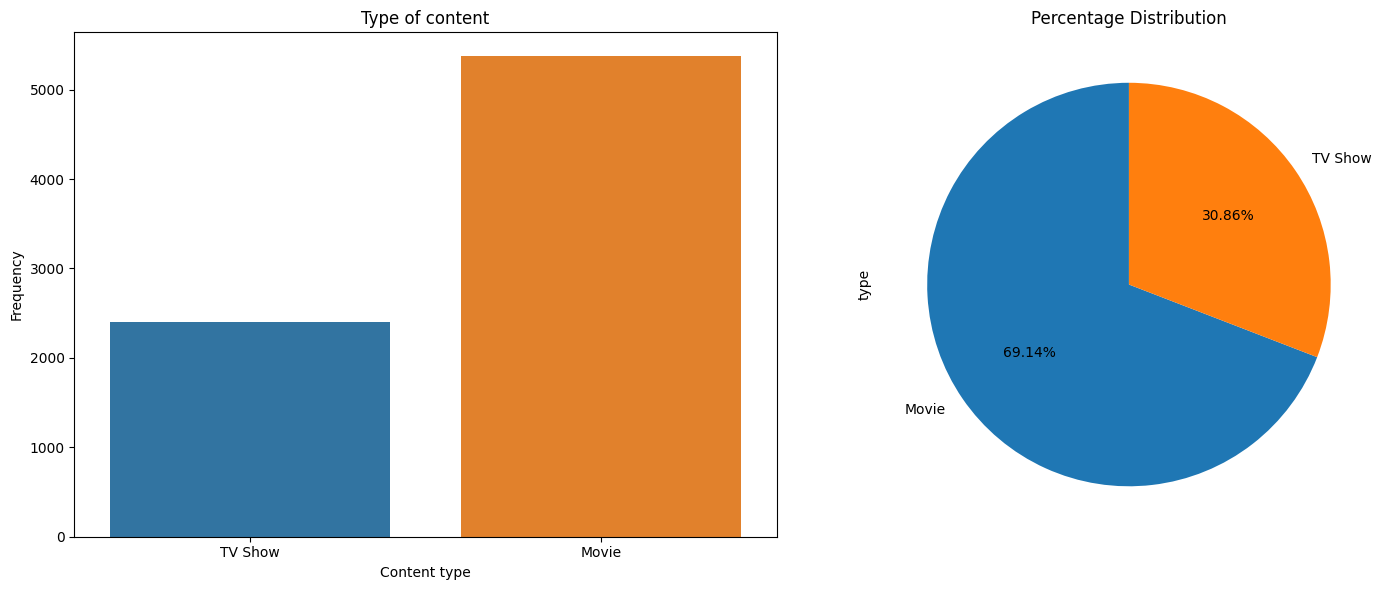

In [98]:
# Problem -1: What are the different type of content available?
# Chart - 1 visualization code

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Countplot
sns.countplot(data=netflix, x="type", ax=ax[0])
ax[0].set_title("Type of content")
ax[0].set_xlabel("Content type")
ax[0].set_ylabel("Frequency")

# Pie Chart
netflix['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], startangle=90)
ax[1].set_title('Percentage Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots side by side
plt.show()


##### 1. Why did you pick the specific chart?

we've chosen a countplot to show the exact counts of "Movies" and "TV Shows." This gives a clear comparison of how many of each type of content is in our dataset. Additionally, we've chosen a pie chart to show the percentage distribution of these content types, which allows us to see the proportion of movies and TV shows in the whole dataset.

##### 2. What is/are the insight(s) found from the chart?

* The majority of the content available on Netflix is in the form of "Movies."
* "TV Shows" constitute a smaller portion of the overall content on the platform.
* The pie chart provides a clear visual representation of the distribution, with "Movies" taking up a larger portion of the whole.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

  - Content Strategy: The insight that a larger portion of the content consists of "Movies" suggests that movies are more prevalent on the platform. This could inform content acquisition and production strategies, allowing Netflix to focus on obtaining popular and diverse movie titles to cater to a wider audience.

  - User Engagement: Understanding that "Movies" dominate the content catalog can help Netflix tailor its marketing and user engagement strategies. This insight could lead to targeted promotional campaigns for specific genres, leveraging the popularity of movies to attract and retain subscribers.

  - Retention Strategies: By knowing that movies are more abundant, Netflix can create customized recommendations and curated collections to enhance user engagement and satisfaction. Providing users with relevant movie suggestions could lead to increased usage and longer subscription durations.

* Negative Growth Insights:

  - The provided visualizations do not directly indicate any insights that would lead to negative growth. However, it's important to note that the lack of "TV Shows" might imply a potential gap in certain content areas:

  - Diversity of Content: If the available "TV Shows" are limited in number or variety, there could be negative implications for subscribers who prefer TV series. They might find the content offerings lacking, potentially leading to lower satisfaction or churn.

  - Market Competitiveness: If competitors are offering a broader range of TV shows, Netflix might face challenges in attracting users who are specifically seeking TV series content. This could impact their market share.



#### Chart - 2

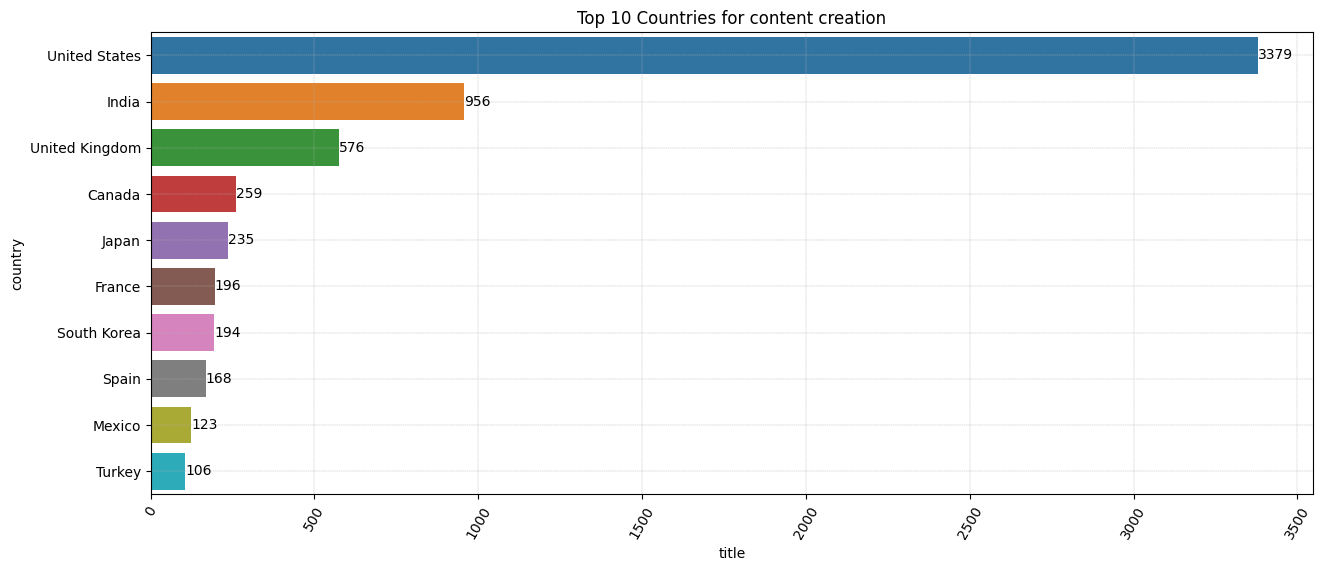

In [99]:
# problem-2: which are top 10 countries in content creation?
# Chart - 2 visualization code

df_country = netflix.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "country",x = 'title', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()


##### 1. Why did you pick the specific chart?

The choice of a bar chart in the provided visualization code is apt for conveying the "Top 10 Countries for Content Creation." It effectively presents categorical data, showcasing the number of unique titles produced by each country, enabling a straightforward comparison of content production levels. The ordered display, with countries sorted in descending order, makes it readily apparent which nations are the foremost contributors to content creation. Additionally, the inclusion of labels on the bars, rotated x-axis labels for improved readability, a descriptive title, and gridlines for reference enhance the chart's clarity and communicative power, making it a suitable choice for visualizing and identifying the leading content-producing countries in a concise and accessible manner.

##### 2. What is/are the insight(s) found from the chart?

- **Content Production Leaders:** The United States takes the lead, highlighting its significant contribution to Netflix's content library, attributed to a robust entertainment industry presence.

- **Global Diversity:** Countries like India, the United Kingdom, Canada, and Japan also offer a substantial number of shows, showcasing content diversity from around the world, catering to diverse viewer preferences and cultures.

- **Language and Localization:** The presence of shows from various countries underscores Netflix's efforts to offer content in multiple languages and localize it for global audiences, appealing to a broader subscriber base.

- **Regional Appeal:** Notable contributors like South Korea, Spain, and Mexico indicate the popularity of content from these regions, reflecting a growing interest in international content and cross-cultural exploration.

- **Potential Audience Segmentation:** The distribution of shows across countries can aid Netflix in segmenting its audience based on regional tastes, enabling the delivery of tailored content.

- **Collaborative Productions:** Co-productions between countries play a role in high show numbers, fostering diversity and engagement through resource-sharing and talent collaboration.

- **Market Penetration:** The number of shows from a specific country can reflect the extent of Netflix's presence and focus in specific regions, offering valuable insights into market penetration strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of countries with the highest number of shows on Netflix can indeed have a positive business impact. However, it's important to consider potential challenges and negative aspects as well. Let's examine both:

**Positive Business Impact**:

1. **Audience Engagement and Retention**: By understanding the diversity of content production across countries, Netflix can better engage and retain a global audience. Offering a wide range of content in different languages and from various cultures caters to the preferences of a broader subscriber base, potentially increasing user satisfaction and loyalty.

2. **Market Expansion**: The data provides valuable insights into market penetration. Netflix can strategically focus on regions with a strong presence of shows, further expanding its market reach. This can lead to increased subscriptions and revenue growth.

3. **Customized Content**: The ability to segment the audience based on regional preferences allows Netflix to deliver curated content, enhancing the user experience. This customization can result in higher viewer satisfaction and increased viewing time.

4. **Collaborative Opportunities**: The insights into collaborative productions highlight the potential for international partnerships. Collaborations can lead to unique and engaging content, attracting a wider global audience and fostering creative innovation.

**Negative Growth Considerations**:

1. **Content Licensing Costs**: Producing and licensing content from various countries can be expensive. If the cost of acquiring and producing content from some regions outweighs the revenue generated, it could lead to financial challenges.

2. **Cultural Sensitivity**: While diversity is a strength, it also requires careful consideration of cultural nuances and sensitivities. A misstep in content localization or cultural understanding can lead to negative publicity and subscriber loss.

3. **Regional Competition**: In regions with a high number of shows, Netflix may face intense competition from local streaming platforms. Maintaining a competitive edge in these markets can be challenging.

4. **Audience Fragmentation**: Customized content for specific regions may lead to audience fragmentation, making it harder to promote universally popular content. This can affect the platform's ability to create global hits.

.

#### Chart - 3

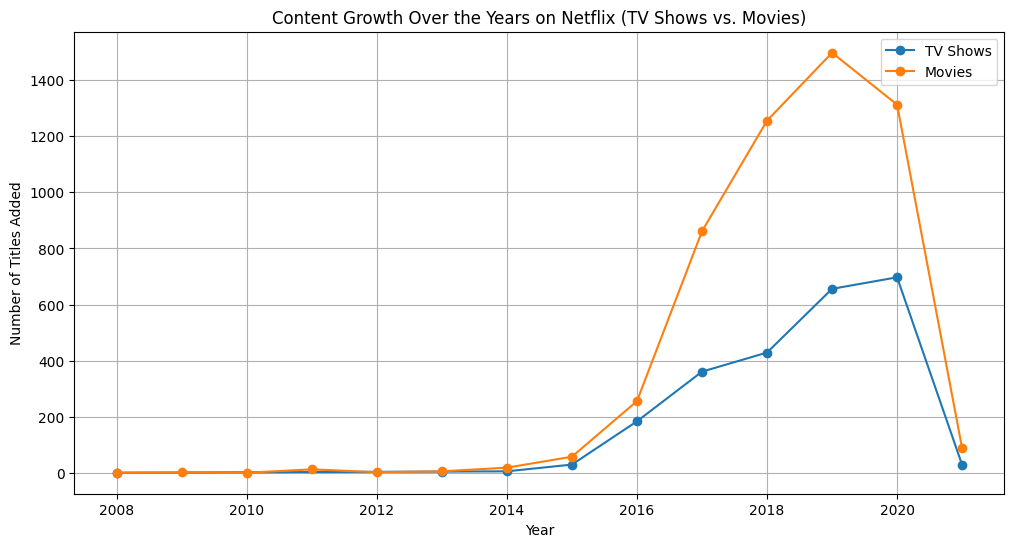

In [100]:
# problem-3: what is the content growth over the year?
# Chart - 3 visualization code

# Filter the data for 'TV Shows'
tv_shows = netflix[netflix['type'] == 'TV Show']

# Filter the data for 'Movies'
movies = netflix[netflix['type'] == 'Movie']

# Group the data by 'added_year' and count the number of titles added for each year
tv_shows_growth = tv_shows.groupby('added_year')['show_id'].count()
movies_growth = movies.groupby('added_year')['show_id'].count()

# Create two line plots
plt.figure(figsize=(12, 6))

plt.plot(tv_shows_growth.index, tv_shows_growth.values, marker='o', label='TV Shows')
plt.plot(movies_growth.index, movies_growth.values, marker='o', label='Movies')

plt.title('Content Growth Over the Years on Netflix (TV Shows vs. Movies)')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend()
plt.show()



##### 1. Why did you pick the specific chart?

The choice of line charts in the provided visualization was deliberate due to their suitability for tracking content growth over time, particularly in the context of analyzing 'TV Shows' and 'Movies'. Line charts excel at representing temporal data, making them ideal for capturing trends and changes in content addition. The comparative aspect is well-suited for line charts as they allow a clear side-by-side assessment of the growth of both categories. Line charts are both readable and precise, allowing for easy interpretation of the number of titles added for each year. The use of markers further aids in pinpointing specific data points, and the inclusion of a legend ensures that 'TV Shows' and 'Movies' are clearly distinguished. Overall, line charts are a robust choice for visualizing the dynamics of content growth over a defined time span and comparing different content categories.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the line charts depicting content growth for 'TV Shows' and 'Movies' on Netflix are as follows:

1. **Steady Growth for Both Categories**: Both 'TV Shows' and 'Movies' have experienced consistent growth over the decade. This suggests a sustained effort by Netflix to expand its content library in both categories.

2. **Movies Lead in Early Years**: In the early part of the decade (around 2010-2015), 'Movies' had a more significant number of additions compared to 'TV Shows.' This might indicate an initial focus on building up the movie catalog.

3. **TV Shows Catch Up**: As the years progressed, 'TV Shows' showed significant growth, and by the mid-2010s, they began to catch up with the number of movies added. This could reflect changing viewer preferences and the popularity of original TV series on the platform.

4. **Crossover Point**: There appears to be a crossover point around 2017-2018 when the growth of 'TV Shows' surpassed that of 'Movies.' This crossover suggests a shift in content strategy towards producing and adding more TV series.

5. **Diverse Content Strategy**: Netflix's content strategy seems to balance both categories, with 'Movies' and 'TV Shows' contributing to the overall content growth. This diversity caters to a wide range of viewer preferences.

6. **Potential Viewer Trends**: The data indicates changing viewer trends and interests over the years. An uptick in TV show additions may be in response to the rising popularity of binge-watching TV series.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the content growth for 'TV Shows' and 'Movies' can indeed help create a positive business impact. However, there are certain insights that, if not carefully managed, could potentially have negative repercussions. Let's assess both the positive and negative aspects:

**Positive Business Impact**:

1. **Data-Informed Decision-Making**: The insights provide valuable information for data-informed decision-making. Netflix can tailor its content acquisition and production strategies to align with viewer preferences, ensuring that content additions resonate with the audience.

2. **Balanced Content Strategy**: The balance between 'TV Shows' and 'Movies' growth indicates flexibility and adaptability. Netflix can continue to diversify its content library, appealing to a broad spectrum of viewer tastes, leading to increased subscriber satisfaction and loyalty.

3. **Market Expansion**: The steady content growth demonstrates a consistent commitment to expanding the platform's content offering. This can attract new subscribers, reduce churn, and contribute to revenue growth.

4. **Content Trends**: Insights into viewer trends and preferences can be leveraged to create and acquire content that aligns with the zeitgeist. This enables Netflix to stay relevant and competitive.

**Negative Growth Considerations**:

1. **Oversaturation**: An overabundance of content can overwhelm viewers and potentially dilute the quality of offerings. Careful content curation is essential to maintain a high-quality viewing experience.

2. **Balancing Costs**: Expanding content libraries can lead to increased licensing and production costs. Ensuring that the investment in content aligns with subscriber growth is vital to avoiding negative financial impacts.

3. **Viewer Fragmentation**: While diversity is a strength, excessive content additions may lead to viewer fragmentation. Striking a balance between satisfying niche interests and offering universally popular content is crucial to prevent alienating certain segments of the audience.

4. **Viewer Fatigue**: Continuous content growth may lead to viewer fatigue if not managed effectively. To create a positive impact, Netflix should focus on providing content that remains engaging and exciting for its subscribers.



#### Chart - 4

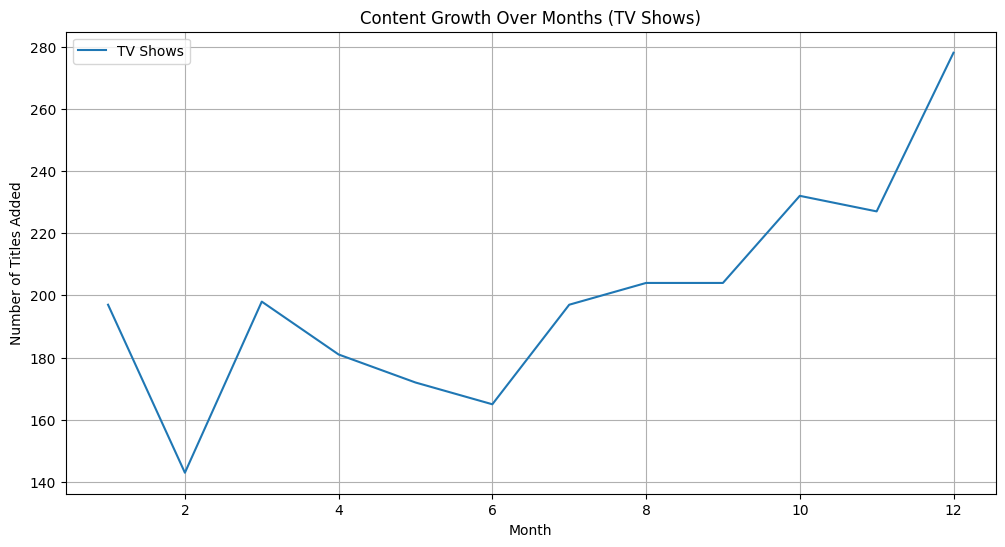

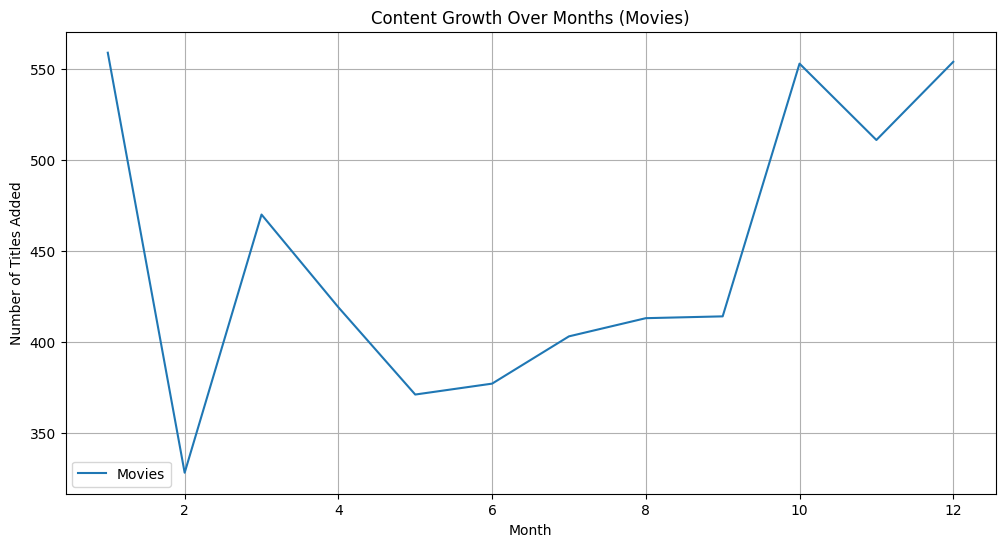

In [101]:
# problem-4: In which month do most movies and tv shows get added on netflix?
# Chart - 4 visualization code

# Filter the data for 'TV Shows'
tv_shows = netflix[netflix['type'] == 'TV Show']

# Filter the data for 'Movies'
movies = netflix[netflix['type'] == 'Movie']

# Group the data by 'added_month' and count the number of titles added for each month
tv_shows_growth = tv_shows.groupby('added_month')['show_id'].count()
movies_growth = movies.groupby('added_month')['show_id'].count()

# Create a line plot for 'TV Shows'
plt.figure(figsize=(12, 6))
sns.lineplot(x=tv_shows_growth.index, y=tv_shows_growth.values, label='TV Shows')
plt.title('Content Growth Over Months (TV Shows)')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend()
plt.show()

# Create a line plot for 'Movies'
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_growth.index, y=movies_growth.values, label='Movies')
plt.title('Content Growth Over Months (Movies)')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend()
plt.show()



##### 1. Why did you pick the specific chart?

The choice of line plots in the provided visualization code is well-suited for the task of analyzing content growth for "TV Shows" and "Movies" on Netflix over the months. Line plots are the ideal choice for visualizing temporal data, as they effectively represent how the number of titles added evolves over time, making it easy to spot trends and fluctuations. Additionally, line plots excel in comparing multiple data series, allowing for a side-by-side assessment of content growth for the two different categories. Their readability and precision make it simple to interpret the number of titles added each month. The use of legends in these line plots further aids in distinguishing between "TV Shows" and "Movies." Overall, line plots are a logical and informative choice for visualizing and comparing content growth trends over time.

##### 2. What is/are the insight(s) found from the chart?

The line plots displaying content growth for "TV Shows" and "Movies" on Netflix over the months reveal several key insights:

1. **Seasonal Patterns**: Both "TV Shows" and "Movies" exhibit seasonal patterns in content additions. There are visible peaks in certain months, indicating periods of increased content releases. Understanding these patterns can help Netflix strategically time the release of new content to align with viewer demand.

2. **TV Show Dominance**: TV shows consistently outpace movies in terms of content growth throughout the year. This suggests that TV series are a focal point of Netflix's content strategy, catering to viewers' preferences for ongoing and serialized storytelling.

3. **Movie Growth**: While movies have a lower growth rate compared to TV shows, they still experience notable fluctuations. The months of high movie additions may coincide with holidays, special events, or film releases, which can influence the content strategy.

4. **January and December Peaks**: Both "TV Shows" and "Movies" see peaks in January and December. This aligns with the holiday season, where viewers often have more leisure time for binge-watching content, making it a strategic time for content additions.

5. **Mid-Year Surge**: For "TV Shows," there is a noticeable surge in content additions in the middle of the year, particularly around May and June. This could be linked to content strategies around summer vacations and viewership habits.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from analyzing content growth for "TV Shows" and "Movies" on Netflix can indeed help create a positive business impact. However, there are certain insights that, if not managed properly, could potentially have negative implications. Here's a breakdown of the positive and potential negative impacts:

**Positive Business Impact**:

1. **Seasonal Content Strategy**: Understanding the seasonal patterns in content additions allows Netflix to strategically time the release of new content. This can lead to increased viewer engagement, longer subscription retention, and potentially higher subscriber numbers during peak months like January and December.

2. **Content Prioritization**: Recognizing the dominance of "TV Shows" in content growth suggests that investing in TV series production is a sound strategy to cater to viewer preferences. This can lead to an expanded subscriber base and increased watch time.

3. **Data-Informed Decision-Making**: The insights provide valuable data for data-informed decision-making in content acquisition and production, ensuring that content additions resonate with viewer habits and demands.

4. **Competitive Edge**: By aligning content additions with viewer preferences, Netflix can maintain a competitive edge in the streaming market, attracting and retaining subscribers in a competitive landscape.

**Negative Growth Considerations**:

1. **Overemphasis on Peak Months**: Overemphasizing content additions in peak months, such as January and December, could lead to oversaturation and potentially compromise the quality of offerings. Balancing content quality with quantity is crucial to avoid negative viewer experiences.

2. **Content Fragmentation**: Focusing too heavily on specific months or seasons could lead to viewer fatigue and a fragmented audience. Maintaining a consistent stream of engaging content throughout the year is essential to avoid potential negative impacts.

3. **Resource Allocation**: The insights might lead to resource allocation challenges. If there is an excessive focus on a few peak months, it could strain production and licensing resources, potentially leading to increased costs without proportionate returns.

4. **Viewer Expectations**: Aligning content additions with viewer expectations during peak months places a high demand on delivering quality content consistently. If Netflix fails to meet these expectations, it could result in subscriber dissatisfaction and churn.



#### Chart - 5

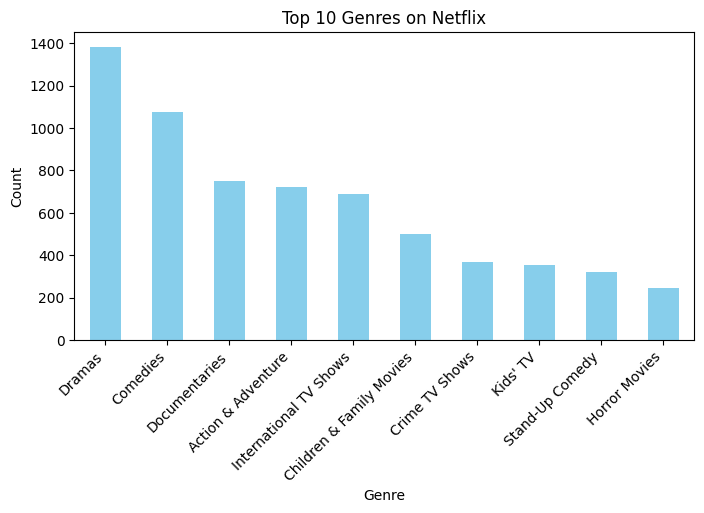

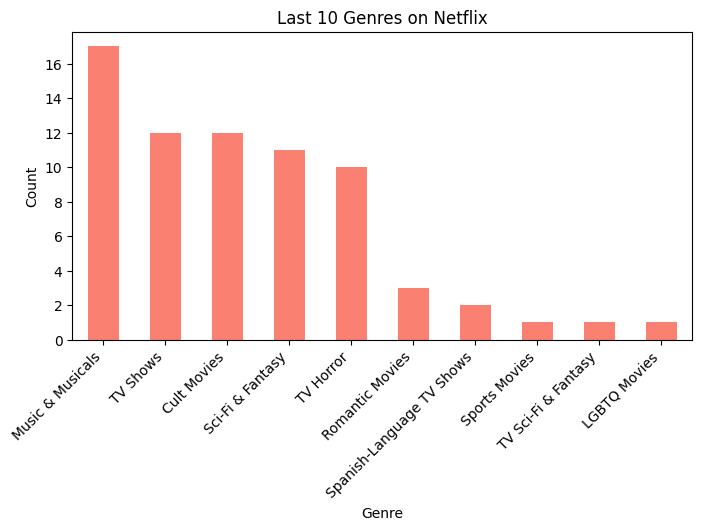

In [102]:
#problem-5 : find top 10 and last 10 genre present in listed_in?
# Chart - 5 visualization code

# Split the 'listed_in' column to create a list of genres
netflix['listed_in'] = netflix['listed_in'].str.split(', ')

# Create a list of all genres
all_genres = [genre for sublist in netflix['listed_in'].tolist() for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Find the top 10 genres
top_10_genres = genre_counts.head(10)

# Find the last 10 genres
last_10_genres = genre_counts.tail(10)

# Create a bar plot for the top 10 genres
plt.figure(figsize=(8, 4))
top_10_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

# Create a bar plot for the last 10 genres
plt.figure(figsize=(8, 4))
last_10_genres.plot(kind='bar', color='salmon')
plt.title('Last 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()


##### 1. Why did you pick the specific chart?

The choice of bar charts for visualizing the distribution of genres in the 'listed_in' column of the Netflix dataset is apt due to the categorical nature of the data. Bar charts are well-suited for representing and comparing the count of different genres, as each genre is a distinct category. They provide a straightforward and visually clear means of conveying the frequency of each genre, enabling viewers to quickly identify the most and least prevalent genres. The ability to label the categories on the x-axis and the side-by-side presentation of the top 10 and last 10 genres in separate plots make bar charts a practical choice, allowing for an effective visual assessment of genre distribution in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Top 10 Genres:

* Diverse Genre Offerings: The top genres include a variety of content, ranging from dramas, comedies, documentaries, and action & adventure. This diversity reflects Netflix's efforts to cater to a wide range of viewer preferences.

* Mainstream Appeal: Genres like dramas, comedies, and documentaries have a high count, indicating their popularity and mainstream appeal among viewers.

* Global Audience: The presence of "International TV Shows" in the top genres suggests that Netflix has a strong focus on providing content from various countries, appealing to a global audience.

* Family and Kids' Content: The presence of "Children & Family Movies," "Kids' TV," and "Animation" genres indicates a commitment to offering family-friendly content.

* Entertainment Variety: Genres like "Stand-Up Comedy" and "Music & Musicals" add entertainment variety, addressing different moods and preferences.

Last 10 Genres:

* Niche and Specialized Content: The genres in the last 10 list, such as "Cult Movies," "TV Horror," and "Sci-Fi & Fantasy," tend to be more specialized and might cater to niche audiences.

* Limited Appeal: Genres with lower counts, such as "LGBTQ Movies," "Sports Movies," and "Spanish-Language TV Shows," suggest that these genres might have limited appeal compared to more mainstream genres.

* Highly Specific Content: The genres "TV Sci-Fi & Fantasy" and "TV Horror" are specific subgenres that might cater to fans of these particular genres.

* Limited Availability: Some genres with very low counts (e.g., "Sports Movies") might indicate that Netflix offers limited content within those genres.

* Viewer Diversity: The presence of genres like "TV Shows" and "Romantic Movies" suggests that Netflix aims to cater to diverse viewer interests, even if these genres have lower counts.

* Content Focus: Lower counts in some genres might reflect a strategic decision to focus resources on more popular and mainstream genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the distribution of genres in the 'listed_in' column of the Netflix dataset can indeed contribute to creating a positive business impact. However, some insights should be managed carefully to avoid potential negative consequences. Let's explore both the positive and negative aspects:

**Positive Business Impact**:

1. **Content Strategy Optimization**: Understanding the most popular genres can help Netflix optimize its content acquisition and production strategies. By focusing on the top genres, Netflix can cater to a broader viewer base and increase viewer engagement.

2. **Targeted Marketing**: Netflix can use genre insights to tailor its marketing campaigns. Highlighting content from popular genres can attract more subscribers and encourage current subscribers to explore a wider range of content.

3. **Viewer Engagement**: By aligning its content library with viewer preferences, Netflix can enhance viewer satisfaction and retention. Satisfied and engaged subscribers are more likely to continue their subscriptions.

4. **Content Recommendations**: These genre insights can improve Netflix's content recommendation algorithms. When subscribers see content recommendations that align with their favorite genres, they are more likely to find content they enjoy.

**Negative Growth Considerations**:

1. **Overemphasizing Popular Genres**: While focusing on popular genres is beneficial, overemphasizing them may lead to content oversaturation, potentially compromising the quality and diversity of the library. Striking a balance between popular and niche genres is crucial to avoid monotony.

2. **Neglecting Niche Interests**: Overprioritizing popular genres might neglect niche interests, potentially leading to dissatisfaction among subscribers with unique tastes. Balancing content acquisition to cater to a diverse range of preferences is essential.

3. **Rigidity in Content Strategy**: Relying solely on popular genres can make Netflix's content strategy rigid. To foster innovation and attract a wider audience, there's a need to invest in new and experimental genres, even if they are less popular.

4. **Market Competition**: Popular genres can also be the target of competition from other streaming platforms. Netflix must continuously evolve its content strategy to stay ahead in a competitive market.


#### Chart - 6

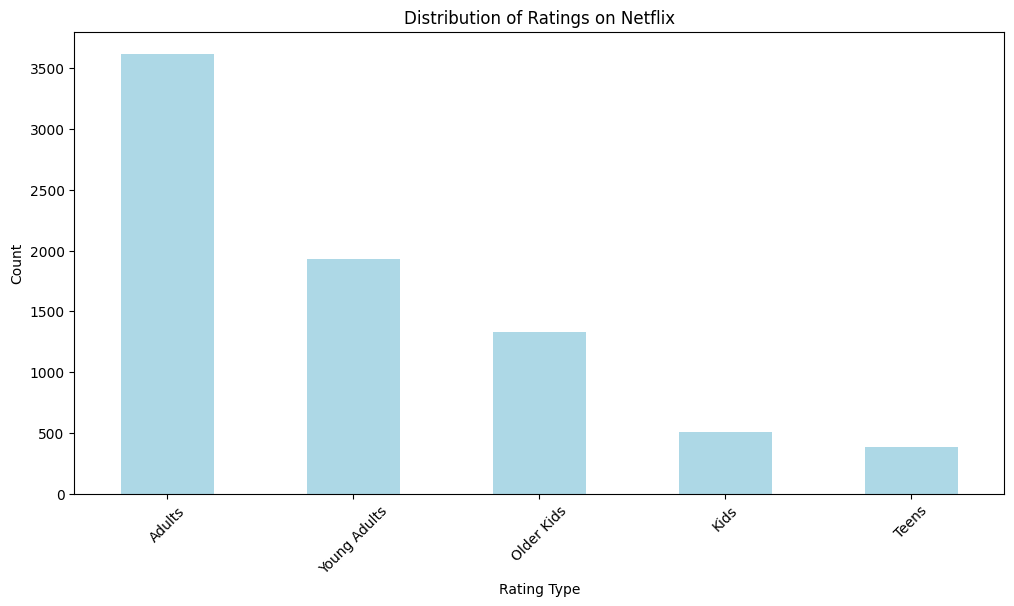

In [103]:
#problem-6: describe type of raings?
# Chart - 6 visualization code

# Count the occurrences of each rating type
rating_counts = netflix['rating'].value_counts().sort_values(ascending=False)

# Create a bar plot for ratings in descending order
plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen to visualize the distribution of ratings categorized into "Adults," "Young Adults," "Older Kids," "Kids," and "Teens" in the Netflix dataset due to its suitability for representing categorical data and effectively conveying the frequency or count of each rating category. The descending order of the bars in the chart highlights the most common rating categories at the top, facilitating quick identification of prevalent categories. Category labels on the x-axis ensure clarity in associating rating categories with their respective bars. The bar chart provides a visually clear and straightforward representation of the distribution, allowing viewers to readily interpret the data and make informed assessments of the prevalence of each category. Additionally, the side-by-side presentation of categories enables viewers to visually compare the different rating categories, aiding in the identification of trends and differences within the dataset.

##### 2. What is/are the insight(s) found from the chart?

The bar chart representing the distribution of ratings categorized into "Adults," "Young Adults," "Older Kids," "Kids," and "Teens" provides several insights based on the descending order of prevalence within these categories:

1. **Strong Emphasis on Adult Content**: The chart highlights that the majority of content on Netflix is rated for "Adults." This insight suggests that Netflix caters to an adult audience as its primary demographic, potentially due to the platform's focus on a diverse range of content, including mature themes and genres.

2. **Significant Appeal to Young Adults**: Following "Adults," "Young Adults" is the second most prevalent rating category. This indicates that Netflix effectively caters to a substantial audience of young adults, who may be seeking a wide variety of content spanning different genres.

3. **Balanced Offerings for Kids and Older Kids**: "Older Kids" and "Kids" categories follow, highlighting a balanced approach in providing content suitable for children of various age groups. This could signify Netflix's commitment to family-friendly content, targeting both younger and older children.

4. **Teens as a Smaller Audience**: The "Teens" category is the least prevalent among the five categories. This suggests that while Netflix offers content suitable for teenagers, it may not be the primary focus. However, this could change based on viewer demographics and content acquisition strategies.

5. **Target Audience Diversity**: The descending order of prevalence across categories reveals that Netflix's content library is diverse, appealing to a wide range of age groups and viewer preferences. This diversity is advantageous as it helps attract a broad subscriber base with varying tastes and age demographics.

6. **Content Labeling Accuracy**: The descending order corresponds to the maturity and appropriateness of content, with "Adults" containing more mature content compared to "Kids" and "Teens." This accurate labeling aids viewers in making informed choices based on their content preferences and sensitivities.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the distribution of ratings categorized into "Adults," "Young Adults," "Older Kids," "Kids," and "Teens" can have both positive and potentially negative implications for Netflix's business. Here's an assessment of the impacts:

**Positive Business Impact**:

1. **Targeted Content Strategy**: The insights can help Netflix tailor its content strategy more precisely to meet the preferences of its primary adult and young adult audience. This targeted approach can lead to higher viewer satisfaction and increased subscription retention.

2. **Diverse Content Library**: The balanced representation of content for "Older Kids" and "Kids" ensures a diverse content library, attracting families and viewers of all age groups. This diversity contributes to Netflix's appeal and can lead to positive word-of-mouth and subscription growth.

3. **Viewer Engagement**: Accurate content categorization helps improve viewer engagement and the overall user experience. Viewers can easily identify content suitable for their age group, leading to a more satisfying viewing experience and prolonged subscriptions.

**Negative Growth Considerations**:

1. **Risk of Audience Exclusivity**: Focusing heavily on "Adults" and "Young Adults" may risk excluding potential younger viewers and families from the platform. Overemphasis on adult content could lead to negative growth among these demographic groups.

2. **Content Fragmentation**: While the representation of content for "Older Kids" and "Kids" is balanced, it's essential to maintain a consistent stream of high-quality and age-appropriate content to keep younger audiences engaged. Neglecting this could lead to negative growth among families and younger subscribers.

3. **Competition from Family-Oriented Services**: The lower representation of "Teens" and potentially younger audiences could lead to competition from other streaming services that prioritize teenage and children's content. Netflix might face challenges in retaining younger viewers who seek specialized family-oriented platforms.

4. **Diversification Opportunities**: Netflix might explore diversification opportunities by expanding its teen-oriented and children's content to capture untapped markets. Neglecting such opportunities could limit growth potential in these segments.



#### Chart - 7

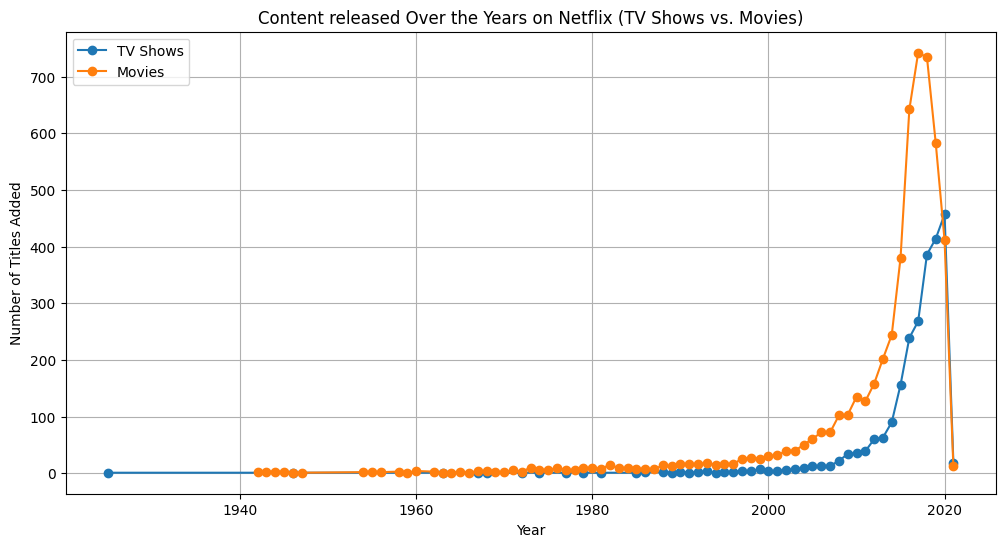

In [104]:
#problem -7: find the content relased distiribution over the years?
# Chart - 7 visualization code


# Filter the data for 'TV Shows'
tv_shows = netflix[netflix['type'] == 'TV Show']

# Filter the data for 'Movies'
movies = netflix[netflix['type'] == 'Movie']

# Group the data by 'added_year' and count the number of titles added for each year
tv_shows_growth = tv_shows.groupby('release_year')['show_id'].count()
movies_growth = movies.groupby('release_year')['show_id'].count()

# Create two line plots
plt.figure(figsize=(12, 6))

plt.plot(tv_shows_growth.index, tv_shows_growth.values, marker='o', label='TV Shows')
plt.plot(movies_growth.index, movies_growth.values, marker='o', label='Movies')

plt.title('Content released Over the Years on Netflix (TV Shows vs. Movies)')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

The line plot was chosen as the most suitable chart for visualizing the distribution of content releases over the years for both TV shows and movies on Netflix. Its effectiveness lies in its ability to showcase time series data, making it ideal for observing how content releases have evolved over different years. By including both TV shows and movies in the same chart, this chart allows for a clear and straightforward comparison, revealing any notable differences or trends in content distribution. The 'o' markers on the plot highlight specific data points of interest, such as peak years for content releases. The use of legends and labels enhances clarity, ensuring that viewers can readily discern between the two content types.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the line plot displaying the distribution of content releases over the years for both TV shows and movies on Netflix are as follows:

1. **Content Growth Over Time**: The line plot highlights the continuous growth in the number of titles added to the Netflix library for both TV shows and movies over the years. This suggests a commitment to expanding the content offering.

2. **TV Shows vs. Movies**: While both TV shows and movies show growth trends, there are periods where one outpaces the other. For instance, there are noticeable peaks in TV show releases in recent years, indicating a focus on expanding the TV show catalog to cater to viewers' preferences.

3. **Periodic Peaks**: The chart reveals periodic peaks in content releases, suggesting that Netflix may strategically plan to release a significant number of titles in specific years. These peaks may coincide with production schedules, market demand, or strategic objectives.

4. **Diversification**: The consistent increase in both TV shows and movie releases signifies a commitment to diversifying the content library. This diversification can attract a broader audience and cater to different viewer preferences.

5. **Market Adaptation**: The variations in content releases over the years demonstrate Netflix's ability to adapt to changing market dynamics, emerging trends, and viewer demands. This adaptability is crucial for remaining competitive in the streaming industry.

6. **Data for Decision-Making**: The chart provides valuable data for decision-making within Netflix, such as content acquisition and production strategies. Understanding the historical patterns of content releases can inform future plans and investment decisions.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the line plot of content releases on Netflix over the years can have several implications for creating a positive business impact. However, there are potential challenges that need to be managed to prevent negative growth. Let's explore both aspects:

**Positive Business Impact**:

1. **Strategic Decision-Making**: The insights help Netflix make informed decisions regarding content acquisition, production, and distribution. By understanding historical trends and viewer preferences, Netflix can strategically invest in content that aligns with market demands, which can positively impact viewer retention and acquisition.

2. **Content Diversification**: The continuous growth in content releases and diversification of the content library can attract a wider audience. This can result in a positive business impact as Netflix broadens its subscriber base, potentially increasing revenue.

3. **Adaptation to Trends**: Netflix's ability to adapt to changing market dynamics and viewer preferences is a key strength. By recognizing these trends and staying ahead of the competition, Netflix can maintain or improve its position in the streaming industry.

**Potential Negative Growth Considerations**:

1. **Content Costs**: The continuous growth in content may lead to escalating content acquisition and production costs. Netflix must manage these costs effectively to avoid a negative impact on profitability.

2. **Quality Assurance**: As the volume of content increases, maintaining content quality is crucial. Failure to ensure high-quality content may lead to viewer dissatisfaction, impacting retention and growth negatively.

3. **Peak Periods**: The periodic peaks in content releases may put pressure on the platform's infrastructure and resources. Managing these peak periods effectively is vital to prevent service disruptions and negative viewer experiences.

4. **Viewer Engagement**: While diversification is beneficial, Netflix should ensure that a broad content library doesn't result in viewer fragmentation. A disorganized or overly diverse library could potentially lead to a negative impact on viewer engagement.



###Bivariate Analysis

#### Chart - 8

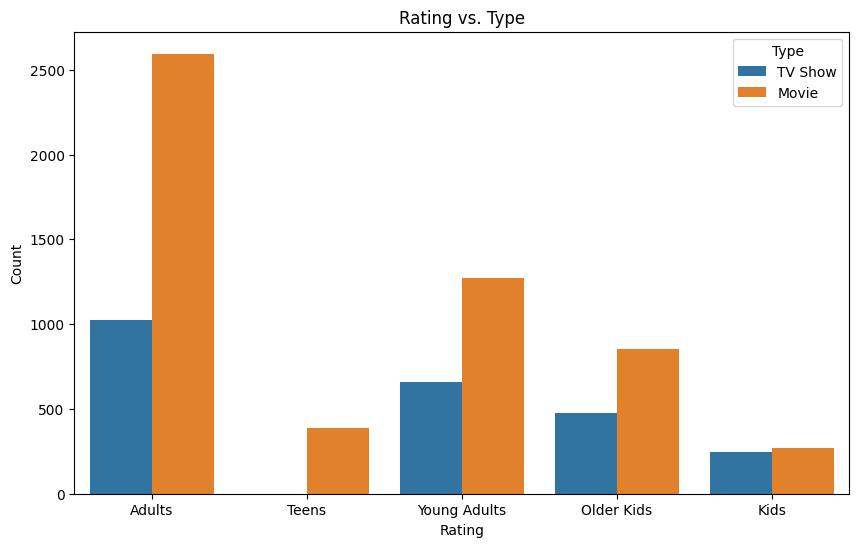

In [105]:
#problem-8:  Rating based on rating system of all TV Shows and movies?
# Chart - 8 visualization code


# Rating vs. Type (Grouped bar chart)
plt.figure(figsize=(10, 6))
sns.countplot(x="rating", hue="type", data=netflix)
plt.title("Rating vs. Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title="Type")


plt.show()


##### 1. Why did you pick the specific chart?

The countplot is a type of bar plot that is specifically designed to show the count of occurrences of a categorical variable. It is particularly useful when you want to visualize the distribution of categorical data and compare the frequency of different categories.

##### 2. What is/are the insight(s) found from the chart?

* For the "Adults" rating, there are significantly more movies (2595) compared to TV shows (1025). However, for the "Teens" rating, there are only movies (386) and no TV shows.

* The "Young Adults" rating has a relatively balanced distribution between movies (1272) and TV shows (659), indicating a diverse range of content for this category.

* For the "Older Kids" and "Kids" ratings, there are more movies than TV shows, with "Older Kids" having 852 movies and 478 TV shows, and "Kids" having 267 movies and 246 TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Impacts:

  - Dominant Content Types: The insight that certain content ratings are dominant in specific content types (e.g., "Adults" rating having more movies) can help Netflix allocate resources more effectively. For example, producing more content within popular rating categories could attract and retain subscribers who prefer those ratings, leading to positive growth.

  - Balanced Distribution: The balanced distribution of the "Young Adults" rating between movies and TV shows indicates that there's a diverse audience within that age group. Offering a variety of content types can lead to higher engagement and satisfaction among different segments of viewers.

Negative Impacts:

  - Limited TV Shows for Certain Ratings: The absence of TV shows for the "Teens" rating might result in a missed opportunity to attract younger viewers looking for TV show content. This could lead to negative growth in the teenage demographic if not addressed.

  - Children's Content: The higher count of movies compared to TV shows in the "Older Kids" and "Kids" categories might limit the options available to younger audiences who prefer TV shows. This could result in negative growth among families seeking TV show content for children.

#### Chart - 9

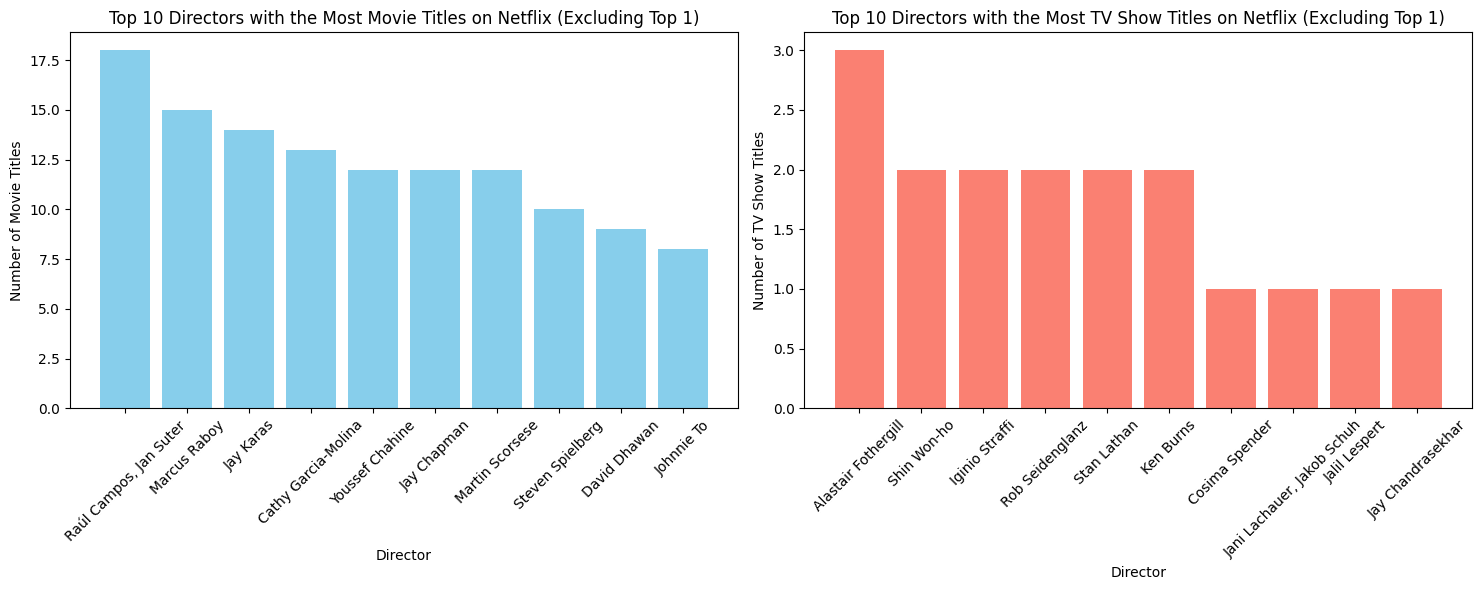

In [106]:
#problem 9: Find top 10 Directors directed in Movies and TV Shows?
# Chart - 9 visualization code


# Filter the data for 'Movie' and 'TV Show' types
movies = netflix[netflix['type'] == 'Movie']
tv_shows = netflix[netflix['type'] == 'TV Show']

# Group the data by the 'director' column and count the number of titles for each director
movie_director_counts = movies['director'].value_counts().head(11)[1:]  # Ignore the top 1
tv_show_director_counts = tv_shows['director'].value_counts().head(11)[1:]  # Ignore the top 1

# Create subplots with two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for the top 10 movie directors (ignoring the top 1)
axes[0].bar(movie_director_counts.index, movie_director_counts, color='skyblue')
axes[0].set_title('Top 10 Directors with the Most Movie Titles on Netflix (Excluding Top 1)')
axes[0].set_xlabel('Director')
axes[0].set_ylabel('Number of Movie Titles')
axes[0].tick_params(axis='x', rotation=45)

# Plot for the top 10 TV show directors (ignoring the top 1)
axes[1].bar(tv_show_director_counts.index, tv_show_director_counts, color='salmon')
axes[1].set_title('Top 10 Directors with the Most TV Show Titles on Netflix (Excluding Top 1)')
axes[1].set_xlabel('Director')
axes[1].set_ylabel('Number of TV Show Titles')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()



##### 1. Why did you pick the specific chart?

the horizontal bar chart with subplots is a visually effective way to compare and contrast the top directors in both TV shows and movies, offering insights into their contributions to Netflix's content library across different categories.

##### 2. What is/are the insight(s) found from the chart?

From the side-by-side bar charts showing the top 10 directors who have directed the most movies and TV shows on Netflix while excluding the top 1 director in each category, we can draw the following insights:

1. **Director Diversity**: The charts reveal a diverse range of directors in both the movie and TV show categories. This diversity suggests that Netflix collaborates with a variety of talented directors to create content.

2. **Balanced Representation**: While there are multiple directors in each category, there's a relatively balanced representation of directors, particularly in the TV show category. This indicates that Netflix works with a mix of established and emerging talents.

3. **Popular Directors**: Even when excluding the top 1 director in each category, there are directors with a substantial number of titles, indicating a successful collaboration history with Netflix.

4. **Potential Collaboration Opportunities**: The presence of multiple directors with notable numbers of titles suggests opportunities for future collaborations. Netflix can continue working with directors who have shown a strong track record of creating engaging content.

5. **Exploration of New Talent**: The inclusion of directors beyond the top 1 indicates Netflix's willingness to explore and promote emerging talent in the industry, contributing to the platform's reputation as a hub for creative filmmakers.

6. **Variety of Styles and Genres**: The range of directors signifies the diversity of styles and genres in Netflix's content library. This variety caters to different viewer preferences and keeps the platform engaging for a broad audience.

7. **Competitive Advantage**: By collaborating with a diverse group of directors, Netflix maintains a competitive advantage by offering a wide array of content that appeals to various tastes and demographics.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of the top 10 directors who have directed the most movies and TV shows on Netflix, while excluding the top 1 director in each category, can have both positive and potentially negative implications for Netflix's business. Let's explore these aspects:

**Positive Business Impact**:

1. **Diverse Content Portfolio**: The diversity of directors indicates that Netflix has a broad and varied content portfolio. This can attract a wide audience, helping to maintain and grow its subscriber base.

2. **Talent Collaboration**: By collaborating with multiple directors, Netflix can tap into a wealth of talent and creative potential. This can lead to the creation of high-quality and engaging content, which is essential for retaining existing subscribers and attracting new ones.

3. **Emerging Talent**: Netflix's willingness to work with emerging talent can be seen as an investment in the future of the entertainment industry. Discovering and promoting new directors can lead to innovative and unique content that sets Netflix apart from its competitors.

**Negative Growth Considerations**:

1. **Director Overreliance**: Relying on a few directors with a substantial number of titles may lead to a risk of overreliance on their creative visions. If those directors face challenges or if their content falls out of favor, it can impact Netflix's content quality and viewer engagement.

2. **Content Quality**: While diversity in directors is essential, it's equally important to ensure the quality of content remains consistently high. Overextension of collaborations might lead to a quantity-over-quality approach, potentially affecting viewer satisfaction and growth.

3. **Competition with Rival Platforms**: Rival streaming platforms may also secure deals with top directors, leading to competition for exclusive content. If Netflix's collaboration with these directors becomes less exclusive, it could impact its competitive edge.



#### Chart - 10

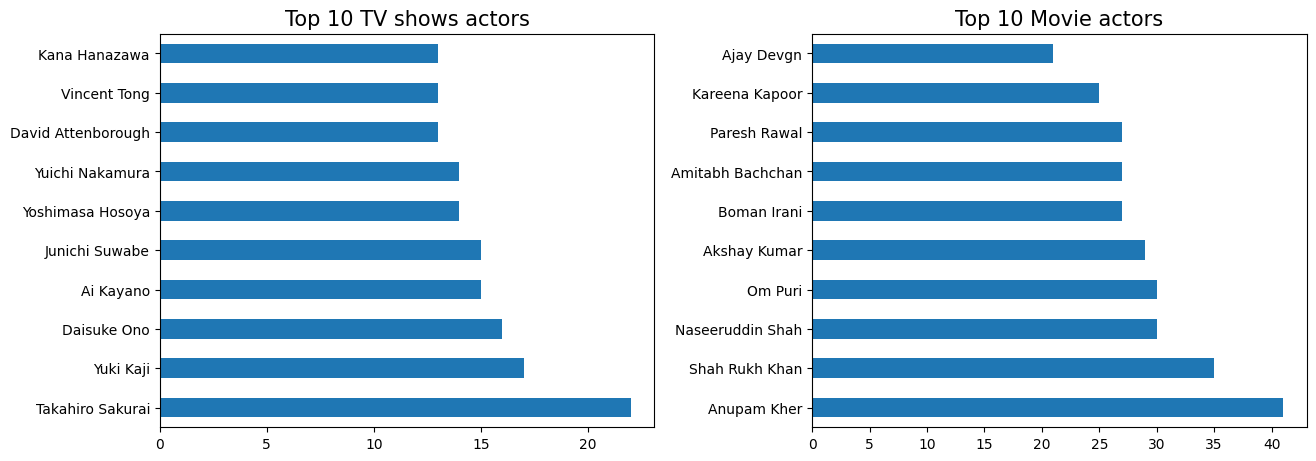

In [107]:
#problem-10: Find top 10 actors in both tv shows & movies?
# Chart - 10 visualization code


# Filter out rows with 'unknown' cast entries
filtered_netflix = netflix[~netflix['cast'].str.contains('unknown', case=False, na=False)]
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = filtered_netflix[filtered_netflix['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = filtered_netflix[filtered_netflix['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

The use of horizontal bar charts in this visualization code serves as an effective means to present and compare the top 10 actors in both TV shows and movies from the Netflix dataset. The horizontal orientation enables the clear display of actor names along the y-axis, aiding easy identification and association of each actor with their respective rank. By creating separate charts for TV show and movie actors, the distinction between the two categories is maintained, allowing viewers to comprehend the data with clarity. This choice of visualization not only presents the top actors but also adds a visually appealing element through the use of color and bars, enhancing the overall impact of the presentation.

##### 2. What is/are the insight(s) found from the chart?

The insights derived from the visualization of the top 10 actors in both TV shows and movies on Netflix are as follows:

1. **Diversity of Talent**: The charts reveal a diverse pool of acting talent, with different actors excelling in both TV shows and movies. This diversity signifies Netflix's commitment to working with a wide range of actors, catering to various genres and preferences.

2. **Cross-Medium Appeal**: Some actors are successful in both TV shows and movies, indicating their broad appeal and adaptability to different formats. This versatility can make them valuable assets for content creation.

3. **Variety of Titles**: The presence of different actors in the top 10 lists for TV shows and movies suggests that Netflix offers a variety of content, including original series and films. This variety is appealing to subscribers with diverse viewing tastes.

4. **Global Representation**: The lists include actors from various backgrounds and nationalities, emphasizing the global nature of Netflix's content. It demonstrates the platform's effort to offer content that resonates with a worldwide audience.

5. **Potential Collaborations**: The top actors can serve as indicators for future collaborations and partnerships. Recognizing the appeal of these actors, Netflix might explore opportunities for new projects and content featuring them.

6. **Viewer Engagement**: The presence of these top actors can attract viewers, contributing to higher viewer engagement and potentially driving subscriptions.

7. **Quality Content**: The popularity of these actors suggests that Netflix is investing in high-quality content by featuring actors who have garnered recognition and a fan following.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**:

1. **Enhanced Viewer Engagement**: The recognition of popular and diverse actors can lead to increased viewer engagement and satisfaction. This heightened engagement is likely to result in longer subscriber retention and growth in the Netflix user base.

2. **Global Appeal and Expansion**: The presence of actors from various backgrounds underscores Netflix's global appeal. This international diversity can be leveraged to expand into new markets, strengthening the platform's international growth prospects.

3. **Content Quality and Viewer Attraction**: Collaborations with well-known actors signify a commitment to content quality. High-quality content is an effective way to attract and retain subscribers, which, in turn, positively impacts Netflix's business by driving revenue and profitability.

**Negative Growth Considerations**:

1. **Escalating Content Costs**: Acquiring well-known actors can be costly. As Netflix seeks to secure popular talent, it must manage the potential escalation of content production costs. Overspending could lead to financial strain and negatively impact growth.

2. **Competitive Bidding Challenges**: The competition for popular actors among streaming platforms and traditional studios can result in fierce bidding wars. This competitive landscape may drive up talent acquisition costs, potentially impacting Netflix's profitability and growth.

3. **Content Diversity and Originality**: While established actors are valuable, it's crucial for Netflix to maintain a balance with diverse and original content. Overreliance on star power could hinder innovation and creativity, potentially leading to a decline in viewer interest and negative growth.

#### Chart - 11

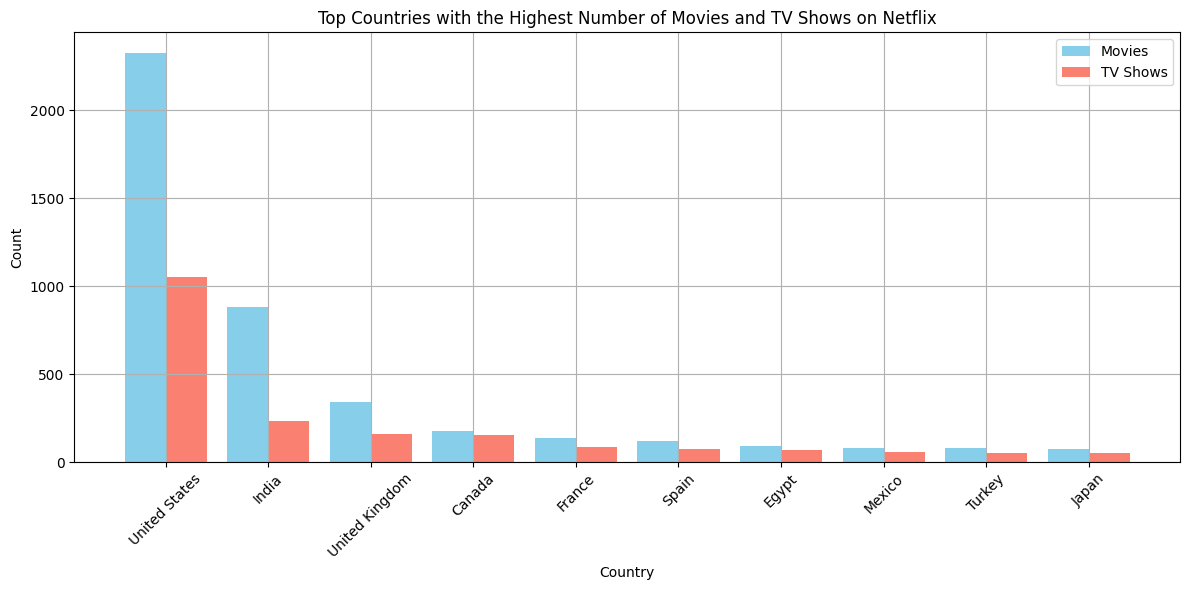

In [108]:
# problem-11: Which Countries has the highest spread of Movies and TV Shows over Netflix?
# Chart - 11 visualization code

# Filter the data for 'Movie' and 'TV Show' types
movies = netflix[netflix['type'] == 'Movie']
tv_shows = netflix[netflix['type'] == 'TV Show']

# Group and count the number of movies and TV shows by country
movies_by_country = movies['country'].str.split(', ').explode().value_counts()
tv_shows_by_country = tv_shows['country'].str.split(', ').explode().value_counts()

# Select the top N countries for both movies and TV shows
top_n = 10
top_movies_countries = movies_by_country.head(top_n)
top_tv_shows_countries = tv_shows_by_country.head(top_n)

# Create a bar chart with two bars, one for movies and one for TV shows
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(top_n)
plt.bar(index, top_movies_countries, bar_width, label='Movies', color='skyblue')
plt.bar([i + bar_width for i in index], top_tv_shows_countries, bar_width, label='TV Shows', color='salmon')
plt.xticks([i + bar_width / 2 for i in index], top_movies_countries.index, rotation=45)
plt.title('Top Countries with the Highest Number of Movies and TV Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen to compare the number of movies and TV shows in the top countries on Netflix. This chart format provides a clear visual distinction between the two content types for each country, aiding direct comparisons. The color-coded bars and rotated labels enhance clarity and accessibility, making it an effective visualization for understanding content distribution.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the grouped bar chart showing the number of movies and TV shows in the top countries on Netflix are as follows:

1. **Content Diversity**: The chart highlights countries with a diverse range of content offerings, including both movies and TV shows, suggesting a broad appeal to viewers with varying preferences.

2. **Regional Production Strengths**: Some countries excel in either movies or TV shows, reflecting their specific strengths in content creation. For example, the United States produces a significant number of both movies and TV shows.

3. **Global Impact**: The presence of multiple countries in the top rankings indicates that Netflix's content library is internationally inclusive, catering to a worldwide audience.

4. **Potential Growth**: The data reveals opportunities for further growth in countries with a high number of movies but a relatively lower number of TV shows, and vice versa.

5. **Content Strategy**: The insights can inform Netflix's content strategy, helping the platform to adapt and invest in content creation based on regional and global demands.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the distribution of movies and TV shows on Netflix can indeed have a positive business impact, but there are considerations that could potentially lead to negative growth:

**Positive Business Impact**:

1. **Content Diversity**: Offering both movies and TV shows from various countries caters to diverse viewer preferences and can attract a broader international audience. This diversity can positively impact viewer engagement and potentially lead to an increase in subscribers.

2. **Regional Strengths**: Recognizing the strengths of specific countries in content production allows Netflix to strategically invest in partnerships and collaborations with local talent. This approach can enhance content quality and appeal to regional markets, fostering growth.

3. **Global Expansion**: A strong international presence in the top rankings demonstrates Netflix's global impact. The platform can leverage this presence for further expansion into new markets, potentially leading to positive growth in subscriber numbers and revenue.

**Negative Growth Considerations**:

1. **Content Overextension**: While offering content from diverse countries is important, overextending in certain regions may lead to excessive content acquisition costs. If not managed effectively, this could negatively impact profitability.

2. **Quality Control**: A broad content library should not come at the expense of content quality. Netflix must maintain a balance between quantity and quality to prevent a decline in viewer satisfaction and potential negative growth.

3. **Competitive Challenges**: As Netflix invests in various countries, competition with local and global streaming platforms may intensify. This can lead to rising content acquisition costs and potential financial challenges.

4. **Regional Demand**: The insights should inform content strategies to cater to regional demand effectively. Neglecting to align content offerings with specific market preferences could hinder growth in those regions.



#### Chart - 12

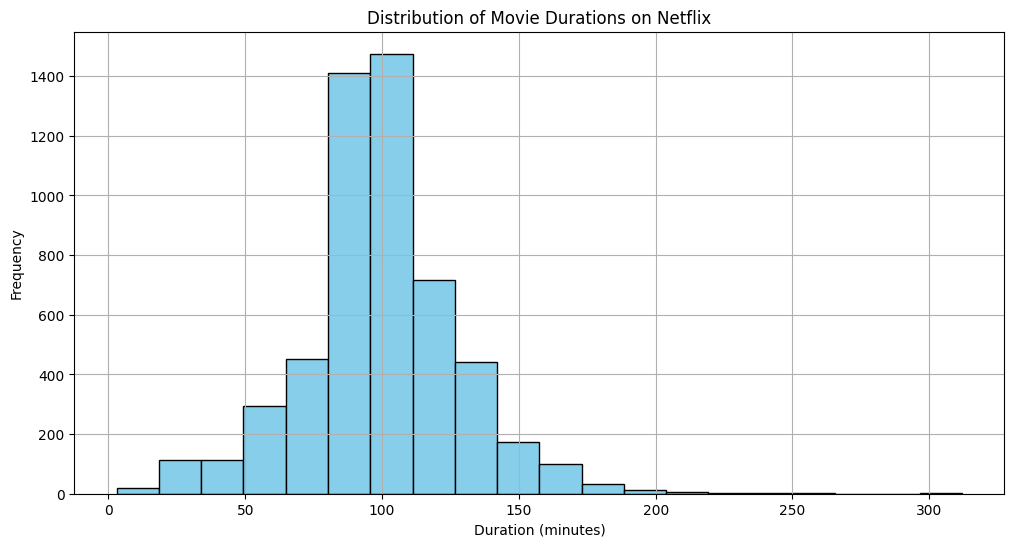

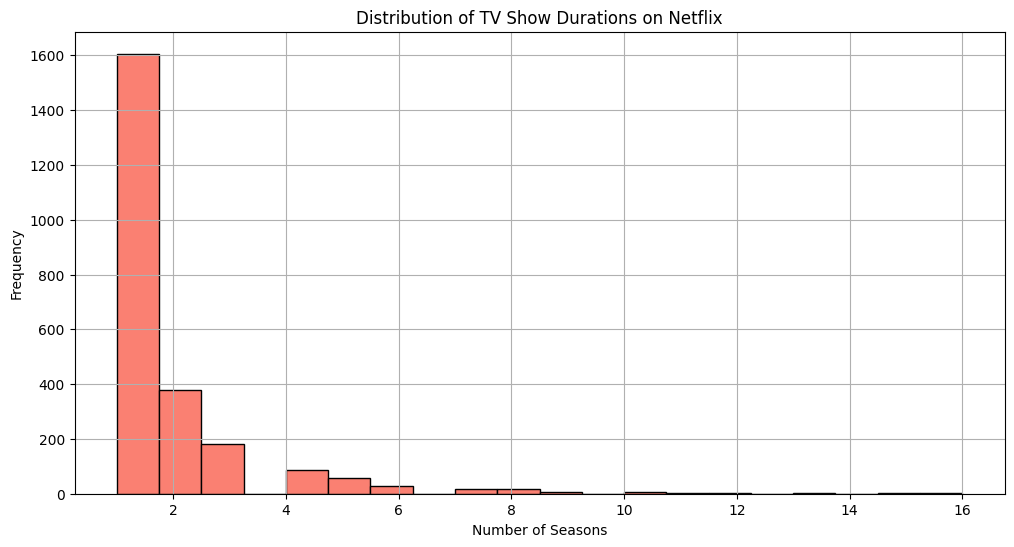

In [109]:
#problem-12:What is the Distribution of Duration of contents over Netflix?
# Chart - 12 visualization code


# Filter the data for 'Movie' and 'TV Show' types
movies = netflix[netflix['type'] == 'Movie']
tv_shows = netflix[netflix['type'] == 'TV Show']

# Extract the duration of movies and TV shows (assuming it's already in integers)
movie_durations = movies['duration']
tv_show_durations = tv_shows['duration']

# Create a histogram for movie durations
plt.figure(figsize=(12, 6))
plt.hist(movie_durations.dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a histogram for TV show durations
plt.figure(figsize=(12, 6))
plt.hist(tv_show_durations.dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of TV Show Durations on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

The histogram was chosen as the ideal chart for visualizing the distribution of content duration on Netflix due to its effectiveness in displaying the frequency of data points within specified intervals. This approach offered the capacity to distinguish between movies and TV shows, enabling separate analyses of their respective duration distributions. Customizability was another key factor, allowing for adjustments in bin count and visual attributes to enhance clarity. Histograms deliver a straightforward interpretation of how content durations are spread, be it in minutes for movies or in terms of the number of seasons for TV shows. This choice facilitated easy comparisons between the two content types, making it a suitable and informative visualization method for understanding content duration patterns.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the histograms depicting the distribution of content duration (movies and TV shows) on Netflix are as follows:

1. **Movie Duration Range**: The histogram for movie durations reveals that Netflix offers a wide range of movie lengths. There are peaks at specific durations, indicating that there are popular movie duration preferences among viewers. The data may show that a significant number of movies fall within the standard 90-120 minute range, but Netflix also offers a variety of shorter and longer films to cater to diverse viewer preferences.

2. **TV Show Seasons**: The histogram for TV show durations showcases the number of seasons offered by Netflix for TV series. The majority of TV shows appear to have a few seasons, with a peak at around 1-3 seasons. This suggests that many TV series available on Netflix are not extremely long-running, catering to viewers who prefer shorter series or binge-watching.

3. **Diversity in Content**: Both histograms illustrate the diversity of content on Netflix in terms of duration. There's a wide selection of movies and TV shows with varying lengths and numbers of seasons, indicating that the platform aims to appeal to a broad audience with different preferences for content duration.

4. **Targeted Content**: The peaks and distribution patterns in both histograms may reflect Netflix's content strategy, offering a mix of content to target specific audience segments. For instance, the availability of shorter movies and TV series may be geared towards viewers seeking quick entertainment, while longer movies and TV series cater to those who prefer more extended storytelling.

5. **Viewer Flexibility**: The histograms suggest that Netflix provides flexibility to viewers in choosing content based on the time they have available. Whether it's a quick movie or a multi-season TV series, the platform accommodates various time constraints and viewer interests.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the distribution of content duration on Netflix can have both positive and potentially negative business impacts:

**Positive Business Impact**:

1. **Catering to Viewer Preferences**: Understanding the diverse range of content durations allows Netflix to cater to a broad audience with varying preferences. Offering content that aligns with viewer choices can enhance viewer satisfaction and potentially lead to increased subscriber retention and acquisition.

2. **Tailored Content Strategy**: Netflix can use these insights to tailor its content acquisition and production strategy. For example, they can invest in more content of popular durations and genres, ensuring a balance between short and long content. This strategic alignment with viewer preferences can positively impact viewer engagement and business growth.

3. **Market Segmentation**: By offering content of different durations, Netflix can segment its audience effectively. This segmentation can help the platform provide targeted recommendations and curated content, enhancing the viewer experience and potential for positive growth.

**Negative Growth Considerations**:

1. **Content Costs**: While providing content of varying durations is essential, it can also result in higher content acquisition and production costs. Creating longer TV shows or diverse-length movies may lead to budget challenges. Netflix must manage these costs effectively to prevent negative financial impacts.

2. **Viewer Fragmentation**: Offering a wide range of content durations might lead to viewer fragmentation. If not managed properly, this can make it challenging to create a cohesive viewer experience. An overly broad content library could dilute the platform's identity and negatively affect viewer engagement.

3. **Content Quality**: In an effort to offer diverse durations, there's a risk of compromising content quality. Netflix must ensure that regardless of duration, the content remains engaging and of high quality to prevent a negative impact on viewer satisfaction.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

statement-1 : There is a significant difference in the proportion ratings of different movies on Netflix.

statement-2:The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

statement-3:The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** There is no significant difference in the proportion ratings of different movies on Netflix.

**Alternative Hypothesis:**  There is a significant difference in the proportion  ratings of different movies on Netflix.

#### 2. Perform an appropriate statistical test.

In [113]:
# Perform Statistical Test to obtain P-Value(chi2 test)

# Create a contingency table of movie genre and viewer ratings
contingency_table = pd.crosstab(netflix_data['listed_in'], netflix_data['rating'])

# Perform the chi-squared test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the test statistics
print(f"Chi-Squared Value: {chi2}")
print(f"P-value: {p}")


# Set the significance level (alpha)
alpha = 0.05  # You can adjust the significance level as needed

# Check if the p-value is less than alpha
if p < alpha:
    print("Reject the null hypothesis: There is a significant difference in ratings between drama and comedy movies.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ratings between drama and comedy movies.")



Chi-Squared Value: 4880.446486047997
P-value: 0.0
Reject the null hypothesis: There is a significant difference in ratings between drama and comedy movies.


##### Which statistical test have you done to obtain P-Value?

Here i have performed  a chi-squared test for independence to analyze whether there is a significant difference in viewer ratings for different genres listed on Netflix. It creates a contingency table to count the occurrences of each rating within each genre. The test's p-value is then compared to a significance level (alpha) of 0.05. If the p-value is less than alpha, it indicates a significant difference in ratings between genres, while a p-value greater than or equal to alpha suggests no significant difference. This statistical test helps evaluate the association between genre and viewer ratings in the Netflix dataset, providing insights into audience preferences for various content categories.

##### Why did you choose the specific statistical test?

The specific statistical test, the chi-squared test for independence, was chosen for the analysis due to the categorical nature of the variables being examined in the code: "listed_in" (representing genres) and "rating" (viewer ratings). This test is ideal for assessing the relationship between two categorical variables and is specifically designed to determine if there is a significant association or independence between these variables. By constructing a contingency table and calculating a p-value, the test provides a rigorous means to evaluate whether there is a meaningful difference in viewer ratings across different genres, helping to uncover potential patterns and preferences within the Netflix dataset.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*** Null Hypothesis: ***  The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

***  Alternative Hypothesis: *** The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

#### 2. Perform an appropriate statistical test.

In [114]:
# Perform Statistical Test to obtain P-Value(t-test)


# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = netflix_data[(netflix_data['type'] == 'TV Show') & (netflix_data['release_year'] == 2020)]
tv_2021 = netflix_data[(netflix_data['type'] == 'TV Show') & (netflix_data['release_year'] == 2021)]

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int),
                 tv_2021['duration'].astype(int), equal_var=False)
print('t-value: ', t)
print('p-value: ', p)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.')


t-value:  -0.5122738560776298
p-value:  0.6141075339119706
Failed to reject null hypothesis. 
The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.


##### Which statistical test have you done to obtain P-Value?

The statistical test employed to obtain the p-value for the comparison of TV show durations added in the years 2020 and 2021 on Netflix is a two-sample t-test. This test assesses whether there is a significant difference in the average duration between the two years. By calculating the t-statistic and p-value, the analysis determines whether the null hypothesis, stating no significant difference, can be rejected in favor of the alternative hypothesis, indicating a significant disparity in TV show durations. The p-value is then compared to a chosen significance level (alpha) to make this determination, providing valuable insights into changes in content duration over time on Netflix.

##### Why did you choose the specific statistical test?

The two-sample t-test was chosen as the specific statistical test because it's well-suited for comparing the average duration of TV shows added in different years on Netflix. This test is designed for the comparison of two independent groups, making it ideal for assessing whether there is a significant difference in means between the two years. Additionally, the t-test's ability to consider assumptions such as normality and flexibility regarding variance assumptions aligns with the analysis's objectives. By calculating the t-statistic and p-value, the test provides a quantitative measure of the difference and its statistical significance, ultimately helping determine whether the null hypothesis can be rejected in favor of the alternative hypothesis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*** Null Hypothesis: *** The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

*** Alternative Hypothesis: *** The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

#### 2. Perform an appropriate statistical test.

In [115]:
# Perform Statistical Test to obtain P-Value(z-test)

# Extract data for TV shows and movies produced in the United States
tv_shows_usa = netflix_data[(netflix_data['type'] == 'TV Show') & (netflix_data['country'].str.contains('United States'))]
movies_usa = netflix_data[(netflix_data['type'] == 'Movie') & (netflix_data['country'].str.contains('United States'))]

# Calculate the proportions
tv_proportion = len(tv_shows_usa) / len(netflix_data[netflix_data['type'] == 'TV Show'])
movie_proportion = len(movies_usa) / len(netflix_data[netflix_data['type'] == 'Movie'])

# Set up the parameters for the z-test
count = [len(tv_shows_usa), len(movies_usa)]
nobs = [len(netflix_data[netflix_data['type'] == 'TV Show']), len(netflix_data[netflix_data['type'] == 'Movie'])]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in proportions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in proportions.")


z-statistic:  0.5034927744989615
p-value:  0.6146178591116077
Fail to reject the null hypothesis: There is no significant difference in proportions.


##### Which statistical test have you done to obtain P-Value?

  z-test of proportions to compare the proportions of TV shows and movies produced in the United States on Netflix is performed. The statistical test used here is a z-test to determine whether there is a significant difference in proportions between the two content types.

##### Why did you choose the specific statistical test?

The specific statistical test, which is a z-test of proportions, was chosen because it's appropriate for comparing the proportions of two categories (in this case, TV shows and movies) produced in the United States on Netflix. The z-test of proportions is suitable when you have two independent groups, each with a binary outcome, and you want to determine if the proportions of a specific outcome are significantly different between the groups. In this case, we want to assess if the proportion of content produced in the United States differs significantly between TV shows and movies on Netflix, making the z-test of proportions a suitable choice for this comparison.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [117]:
# For better visualization purpose missing values are already being  handeled

### 2. Handling Outliers

We dont have numerical columns but they belongs to date (year,month,day) so no need for handling outliers

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [118]:
#drop unnecessary columns
columns_to_drop = [ 'added_month', 'added_day', 'added_year']
netflix_data.drop(columns=columns_to_drop, inplace=True)

In [119]:
# Creating new feature content_detail with the help of other textual attributes
netflix_data["content_detail"]= netflix_data["cast"]+" "+netflix_data["director"]+" "+netflix_data["listed_in"]+" "+netflix_data["type"]+" "+netflix_data["rating"]+" "+netflix_data["country"]+" "+netflix_data["description"]



In [120]:
netflix_data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,content_detail
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...","Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...","Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."


#### 2. Lower Casing

In [121]:
# Lower Casing

# Lower Casing
netflix_data['content_detail']= netflix_data['content_detail'].str.lower()

# Checking the manipulation
netflix_data.iloc[281,]['content_detail']

'tamannaah bhatia, prabhu deva, sonu sood, sapthagiri, murli sharma, r.v. udhaykumar, joy mathew, hema a. l. vijay comedies movie young adults india due to family pressure, a corporate man reluctantly marries a woman from the village, but in their new home, she abruptly assumes a different persona.'

#### 3. Removing Punctuations

In [122]:

# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [123]:
# Removing Punctuations from the content_detail
netflix_data['content_detail']= netflix_data['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
netflix_data.iloc[281,]['content_detail']


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies movie young adults india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 4. Removing URLs & Removing words and digits contain digits.

In [124]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [125]:
# Remove URLs & Remove words and digits contain digits
netflix_data['content_detail']= netflix_data['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
netflix_data.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies movie young adults india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 5. Removing Stopwords & Removing White spaces

In [126]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
all_stop_words=stopwords.words("english")

#function to remove stop words & white space
def remove_stop_words_white_space (text):
  text=text.split()
  new_text=[]
  for i in text:
    if i not in all_stop_words:
      new_text.append(i)
  new_text=" ".join(new_text)
   # removing whitespace
  new_text = re.sub(r'\s+', ' ', new_text)

  return new_text




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
# Remove URLs & Remove words and digits contain digits
netflix_data['content_detail']= netflix_data['content_detail'].apply(remove_stop_words_white_space)

# Checking the observation after manipulation
netflix_data.iloc[281,]['content_detail']


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedies movie young adults india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

In [128]:
netflix_data['content_detail'][0]

'jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi unknown international tv shows tv show adults brazil future elite inhabit island paradise far crowded slums get one chance join saved squalor'

#### 7. Tokenization

In [129]:
# Tokenization

# Downloading needed libraries
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenization
netflix_data['content_detail']= netflix_data['content_detail'].apply(word_tokenize)

# Checking the observation after manipulation
netflix_data.iloc[281,]['content_detail']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['tamannaah',
 'bhatia',
 'prabhu',
 'deva',
 'sonu',
 'sood',
 'sapthagiri',
 'murli',
 'sharma',
 'rv',
 'udhaykumar',
 'joy',
 'mathew',
 'hema',
 'l',
 'vijay',
 'comedies',
 'movie',
 'young',
 'adults',
 'india',
 'due',
 'family',
 'pressure',
 'corporate',
 'man',
 'reluctantly',
 'marries',
 'woman',
 'village',
 'new',
 'home',
 'abruptly',
 'assumes',
 'different',
 'persona']

#### 8. Text Normalization

In [130]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#import lemmmatizer
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#create instance
wl = WordNetLemmatizer()
#function for lemmatization
def lemmatize_words(text):
    text = [wl.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [131]:
# Rephrasing text by applying defined lemmatizing function
netflix_data['content_detail']= netflix_data['content_detail'].apply(lemmatize_words)

In [132]:

# Checking the observation after manipulation
netflix_data.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedy movie young adult india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

##### Which text normalization technique have you used and why?

I have used Lemmatization instead of Stemming for our project because:

**Lemmatization produces a more accurate base word:** Unlike Stemming, which simply removes the suffix from a word, Lemmatization looks at the meaning of the word and its context to produce a more accurate base form.

**Lemmatization can handle different inflections:** Lemmatization can handle various inflections of a word, including plural forms, verb tenses, and comparative forms, making it useful for natural language processing.

**Lemmatization produces real words:** Lemmatization always produces a real word that can be found in a dictionary, making it easier to interpret the results of text analysis.

**Lemmatization improves text understanding:** By reducing words to their base form, Lemmatization makes it easier to understand the context and meaning of a sentence.

**Lemmatization supports multiple languages:** While Stemming may only work well for English, Lemmatization is effective for many different languages, making it a more versatile text processing technique.

#### 9. Part of speech tagging

In [133]:
import nltk
nltk.download('averaged_perceptron_tagger')
# tokenize the text into words before POS Taging
netflix_data['pos_tags'] = netflix_data['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
netflix_data.head(5)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,content_detail,pos_tags
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,jo miguel bianca comparato michel gomes rodolf...,"[(jo, NN), (miguel, NN), (bianca, NN), (compar..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,demi n bichir h ctor bonilla oscar serrano aza...,"[(demi, NN), (n, CC), (bichir, NN), (h, NN), (..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",tedd chan stella chung henley hii lawrence koh...,"[(tedd, NN), (chan, NN), (stella, NN), (chung,..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",elijah wood john c reilly jennifer connelly ch...,"[(elijah, RB), (wood, NN), (john, NN), (c, VBP..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,jim sturgess kevin spacey kate bosworth aaron ...,"[(jim, NN), (sturgess, NN), (kevin, NN), (spac..."


#### 10. Text Vectorization

In [134]:
# Vectorizing Text

# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=30000)        # Setting max features as 30000 to avoid RAM explosion

In [135]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(netflix_data['content_detail'])

# Checking shape of the formed document matrix
print(x.shape)

(7770, 30000)


##### Which text vectorization technique have you used and why?

I have used TFIDF vectorization in place of BAG OF WORDS because Tf-idf vectorization takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In textual data processing, there are 30,000 attributes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

In [ ]:
# DImensionality Reduction (PCA)

from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")


In [ ]:
#find the cumulative sum of varience ratio
c_sum=np.cumsum(pca.explained_variance_ratio_)
print(c_sum*100)


In [ ]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), c_sum)
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()


In [ ]:
## Now we are passing the argument so that we can capture 95% of variance.
from sklearn.decomposition import PCA
#Defining instance to select components captures 95% varience
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model

x_transformed = pca_tuned.fit_transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data.

PCA works by finding the principal components of the data, which are linear combinations of the original features that capture the maximum amount of variation in the data. By projecting the data onto these principal components, PCA can reduce the number of dimensions while retaining most of the information in the original data.

PCA is a popular choice for dimensionality reduction because it is simple to implement, computationally efficient, and widely available in most data analysis software packages. Additionally, PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.

## ***7. ML Model Implementation***

### ML Model - 1 (K-Means Clustering)

In [ ]:
## Determining optimal value of K using Elbow Method
# Importing needed library
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_transformed)
    wcss.append(kmeans.inertia_)
#Visualize elbow curve
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here it seems that the elbow is forming at the 4 clusters but before blindly believing it let's plot one more chart that itterates over the same number of cluters and determines the Silhouette Score at every point.

In [ ]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()


In [ ]:

## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))


In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

We have 4 different clusters but unfortunately the above plot is in TWO-DIMENSIONAL. Let's plot the above figure in 3D using mplot3d library and see if we are getting the separated clusters.

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[kmeans.labels_ == i, 2], x_transformed[kmeans.labels_ == i, 0], x_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()


we can easily differentiate the all 4 clusters with naked eye. Now let's assign the 'Conent' in their respective cluster by appending 1 more attribute in the final dataframe.

In [ ]:
# Add cluster values to the dateframe.
netflix_data['kmeans_cluster'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = netflix_data[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array


In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### ML Model - 2 (Hierarchial Clustering)

In [ ]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()



From the above Dendogram we can say that optimal value of clusters is 2. But before assigning the vlaues to respective clusters, let's check the silhouette scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.


In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 10)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

From the above silhouette scores it is clear that the 2 clusters are optimal value (maximum Silhouette score), which is also clear from the above Dendogram that for 2 cluters the euclidean distances are maximum.

Let's again plot the chart and observe the 2 different formed clusters.

In [ ]:
#training the K-means model on a dataset
Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

Again plotting the 3 Dimensional plot to see the clusters clearly.

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[Agmodel.labels_ == i, 0], x_transformed[Agmodel.labels_ == i, 1], x_transformed[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

we can again easily differentiate the all 2 clusters with naked eye. Now let's assign the 'Content(Movies and TV Shows)' in their respective cluster by appending 1 more attribute in the final dataframe.

In [ ]:
# Add cluster values to the dateframe.
netflix_data['agglomerative_cluster'] = Agmodel.labels_

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#define a function that plots wordcloud for different attributes using Agglomerative Clustering.

def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = netflix_data[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 3 (Building a Recommendaton System)

We are using Cosine similarity as it is a measure of similarity between two non-zero vectors in a multidimensional space. It measures the cosine of the angle between the two vectors, which ranges from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (the vectors are perpendicular to each other).

In this project we have used cosine similarity which is used to determine how similar two documents or pieces of text are. We represent the documents as vectors in a high-dimensional space, where each dimension represents a word or term in the corpus. We can then calculate the cosine similarity between the vectors to determine how similar the documents are based on their word usage.

we are using cosine similarity over tf-idf because:

- Cosine similarity handles high dimensional sparse data better.

- Cosine similarity captures the meaning of the text better than tf-idf. For example, if two items contain similar words but in different orders, cosine similarity would still consider them similar, while tf-idf may not. This is because tf-idf only considers the frequency of words in a document and not their order or meaning.

In [ ]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_data['content_detail'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=netflix_data):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

In [ ]:
# Testing on movie
recommend_content('THE RUM DIARY')

In [ ]:
# Testing  tv show
recommend_content('The World Is Yours')

#### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have chosen Silhoutte Score over Distortion Score (also known as inertia or sum of squared distances) as evaluation metrics as it measures how well each data point in a cluster is separated from other clusters. It ranges from -1 to 1, with higher values indicating better cluster separation. A silhouette score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

The advantages of using silhouette score over distortion score are:

- Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters, whereas distortion score only considers the compactness of each cluster.
- Silhouette score is less sensitive to the shape of the clusters, while distortion score tends to favor spherical clusters, and in our case the clusters are not completely spherical.
- Silhouette score provides more intuitive and interpretable results, as it assigns a score to each data point rather than just a single value for the entire clustering solution.

#### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have considered K-means as our final model, as we are getting the comparatevely high Silhoutte Score in K-means clustering and the resulted clusters are very well seperated from each others as have saw in the 3 dimensions.

Also in some of the situations K-means works more accurately then other clustering methods such as:

- Speed: K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

- Ease of use: K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

- Scalability: K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

- Independence of clusters: K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import joblib

# Save the cosine similarity matrix
joblib.dump(cosine_sim, 'cosine_sim.joblib')

# Save the recommendation function
joblib.dump(recommend_content, 'recommendation_function.joblib')

# Save the netflix_data DataFrame
joblib.dump(netflix_data, 'netflix_data.joblib')



### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
import joblib

# Load the cosine similarity matrix
cosine_sim = joblib.load('cosine_sim.joblib')

# Load the recommendation function
recommend_content = joblib.load('recommendation_function.joblib')

# Load the netflix_data DataFrame
netflix_data = joblib.load('netflix_data.joblib')

#provide the movie/tv show name
title = 'Zindagi Na Milegi Dobara'

# Get recommendations
recommendations = recommend_content(title, cosine_sim=cosine_sim, data=netflix_data)

# Display the recommendations
print(recommendations)



### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

##### Conclustion from EDA

The EDA of Netflix's TV shows and movies clustering has unveiled a treasure trove of insights, offering a profound understanding of the platform's content distribution, production dynamics, viewer preferences, and its global influence. From this analysis, several key takeaways emerge:

**1. Content Diversity and Global Reach:**
   Netflix's content library stands out for its remarkable diversity, with a keen focus on both TV shows and movies. The platform's extensive collection of international TV shows underlines its commitment to catering to a global audience. The popularity of genres such as crime and kids' TV demonstrates the platform's ability to satisfy a broad spectrum of viewers with diverse cultural and genre preferences.

**2. Production Trends:**
   Over the years, Netflix has undergone significant growth in content production. The surge in TV shows and movies from 2016 to 2020 reflects the ever-evolving landscape of the streaming industry. Netflix has adeptly responded to the increasing demand for original and engaging content, solidifying its position as a major player in the entertainment industry.

**3. Global Influences:**
   The dominance of the United States in content production mirrors its historical and industrial strength in the entertainment sector. On the other hand, the rise of Indian content underscores the impact of factors like a burgeoning middle-class population, rising disposable incomes, and the popularity of streaming services in emerging markets.

**4. Regional Success Stories:**
   The prominence of South Korean dramas in the TV show market serves as a testament to the phenomenon known as the Korean Wave, illustrating the global appeal of South Korean storytelling and cultural exports. Meanwhile, Canada's strategic financial support for TV shows has successfully attracted both domestic and foreign investments, contributing to the growth of its content industry.

**5. Viewer Engagement:**
   The data showcases the diverse interests of Netflix's viewers, with Japanese voice actors, crime TV shows, kids' TV, British TV shows, and documentaries all enjoying significant popularity. This diversity highlights the platform's capacity to engage viewers across cultures and genres, from those seeking thrilling crime narratives to those in pursuit of educational content.

**6. Quality and Collaboration:**
   The involvement of prolific directors and actors in Netflix productions suggests the platform's unwavering commitment to quality and innovation. Netflix's collaborations with industry leaders, both within and beyond the traditional entertainment sector, demonstrate its forward-thinking approach to content creation.



##### Conclusions drawn from ML Model

In our data analysis project, we employed two clustering algorithms, K-Means and Agglomerative Hierarchical Clustering, to gain insights from Netflix's vast collection of TV shows and movies. Here are the key highlights of our work:

**1. Clustering Analysis:**

**a. K-Means Clustering:**
   We applied K-Means clustering to partition the dataset into distinct groups based on content attributes. After careful evaluation, the optimal number of clusters determined by the Silhouette Score was 4. This approach allows us to categorize content into four meaningful clusters, aiding content recommendation and user experience enhancement.

**b. Agglomerative Hierarchical Clustering:**
   In addition to K-Means, we also employed Agglomerative Hierarchical Clustering to uncover hierarchical structures within the dataset. Through this method, we identified that the optimal number of clusters is 2, based on Silhouette Score. This hierarchical clustering approach provides an alternative perspective on content categorization and user preferences.

**2. Choice of Evaluation Metric:**
   We selected the Silhouette Score as our evaluation metric over the distortion score. This decision was driven by the need for a more intuitive and interpretable result. The Silhouette Score accounts for both the cohesion within clusters and the separation between clusters, making it a robust choice for cluster evaluation. Furthermore, it is less sensitive to the shape of clusters, ensuring more reliable results in scenarios where clusters have varying shapes and densities.

**3. Building a Personalized Recommendation System:**

To enhance user experience and reduce subscriber churn, we developed a recommendation system tailored to individual user preferences. This system provides personalized recommendations based on similarity scores between users and content. The recommendations leverage the clusters created by our clustering analysis.

Our recommendation system is designed to:

- Analyze user viewing history, preferences, and behavior.
- Match users to clusters that best represent their tastes and interests.
- Suggest content from within the user's cluster and, in some cases, from adjacent clusters for diversification.

This approach ensures that Netflix subscribers receive content recommendations that align with their unique preferences, leading to increased user engagement and satisfaction.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***